Globally averaged temperature:

$$
\frac{dT}{dt} = R_i -  R_0(T, C)
$$


$$
R_i(T) = \frac{Q_0}{c} (1 - p \alpha_\text{land} - p \alpha_\text{oc}) 
$$

$$
R_o(T, C) = \frac{1}{c} (\kappa (T - T_\kappa) - a \ln (\frac{C}{C_0}) )
$$


Accumulated anthropogenic carbon, $S_a$
$$
\frac{d S_a}{dt} = C_a
$$

Atmospheric carbon concentration:

$$
\frac{dC}{dt} = v + C_a - W_a A_v C g^{vege}(T) + \frac{c_0}{\tau_c} \kappa_P (1 - f) + \frac{c_0}{\tau_c} \kappa_B(1 - f) - \frac{\lambda}{\tau_c} C(1 - f)
$$


$$
\kappa_P = \exp( - {\color{red}{b_P}} (T - T_0) )
$$

$$
b_P = \bar{b_p} + \sigma_P
$$

$$
\kappa_B = \exp({\color{red}{b_B}} (T - T_0))
$$

$$
b_B = \bar{b_B} + \sigma_B
$$

Temperature anomaly:
$$
\tilde{T} := T - T_{preindustrial}
$$

Carbon concentration anomaly:
$$
\tilde{C} := C - C_{preindustrial}
$$



$$
\begin{align}
\delta \phi(\tilde{T}, \tilde{C}) =& \max_{C_a} \delta \eta \log C_a  \\
& + \frac{d \phi (\tilde{T}, \tilde{C})}{d\tilde{T}}\frac{1}{c} \left(- \kappa \tilde{T} + a \ln(\tilde{C} + C_0) - a \ln(C_0) \right)\\
& + \frac{d\phi(\tilde{T}, \tilde{C} )}{d \tilde{C} } \left(  C_a - W_a A_v \tilde{C} + \frac{c_0}{\tau_c} \left(\kappa_P(\tilde{T} + T_{preindustrial}) - \kappa_P(T_{preindustrial}) \right) (1 - f)\\
+ \frac{c_0}{\tau_c} \left(\kappa_B(\tilde{T} + T_{preindustrial}) - \kappa_B(T_{preindustrial}) \right)  (1 - f) - \frac{\lambda}{\tau_c} \tilde{C}(1 - f)\right)\\
& + (\eta - 1) (\gamma_1 + \gamma_2 \tilde{T}) \frac{1}{c}\left(- \kappa \tilde{T} + a \ln(\tilde{C} + C_0) - a \ln(C_0) \right)
\end{align}
$$

$$
C_a^{*} = - \frac{ \delta \eta}{\frac{d \phi (\tilde{T}, \tilde{C})}{d \tilde{C}} }
$$

$$
c \dot{T}_{preindustrial} = 0 =  Q_0 (1 - p \alpha_{land} - (1 - p) \alpha_{ocean} ) - \kappa (T_{preindustrial} - T_{\kappa} ) + 5.35 \ln(\frac{C_{preindustrial} }{C_0})
$$

$$
\dot{C}_{preindustrial} = 0 = v - W_a A_v C_{preindustrial} + \frac{c_0}{\tau_c} \kappa_P(T_{preindustrial}) (1 - f) + \frac{c_0}{\tau_c} \kappa_B (T_{preindustrial}) (1 - f) - \frac{\lambda}{\tau_c} C_{preindustrial} (1  -f)
$$

In [487]:
import sys
sys.path.append("../src/")
import numpy as np
import pandas as pd
import pickle
from scipy.integrate import solve_ivp
from scipy.fft import fft, fftfreq
from matplotlib import pyplot as plt
from matplotlib import rcParams
from matplotlib.colors import SymLogNorm
import matplotlib.mlab
import scipy.io as sio
import pandas as pd
import scipy.optimize as optim
from scipy.optimize import curve_fit
from scipy import interpolate
from scipy import fft, arange, signal
from scipy.interpolate import RegularGridInterpolator
import SolveLinSys
from supportfunctions import finiteDiff
rcParams["figure.figsize"] = (8,5)
rcParams["savefig.bbox"] = 'tight'
                                                                                
def PDESolver(stateSpace, A, B1, B2, C1, C2, D, v0, 
              ε = 1, tol = -10):                                              
                                                                                 

    A = A.reshape(-1,1,order = 'F')                                         
    B = np.hstack([B1.reshape(-1,1,order = 'F'),B2.reshape(-1,1,order = 'F')])
    C = np.hstack([C1.reshape(-1,1,order = 'F'),C2.reshape(-1,1,order = 'F')])
    D = D.reshape(-1,1,order = 'F')                                         
    v0 = v0.reshape(-1,1,order = 'F')                                       
    out = SolveLinSys.solveFT(stateSpace, A, B, C, D, v0, ε, tol)           

    return out                                                            

In [488]:
# Anthropogenic emissions (zero or one)
Can = pd.read_csv("rcp30co2eqv3.csv")
#times2co2eq
#rcp85co2eq.csv
Ca = Can[(Can["YEARS"] > 1799) & (Can["YEARS"] < 2801)]
Ca1 = Can[(Can["YEARS"] > 1799) & (Can["YEARS"] < 2801)]

Ca = Ca["CO2EQ"]
Ca = Ca - 281.69873
Ca = Ca.to_numpy()

Ce = np.arange(1001) * 1.0
#np.min(Ca)
for i in range(len(Ce)):
    if i == 0:
        Ce[i] = 0
    else:
        Ce[i] = Ca[i] - Ca[i-1] 
        
t_val = np.linspace(0, 1000, 1001)
def Yam(t):
    t_points = t_val
    em_points = Ce
    
    tck = interpolate.splrep(t_points, em_points)
    return interpolate.splev(t,tck)
        
Cebis = np.arange(1001) * 1.0
#np.min(Ca)
for i in range(len(Cebis)):
    if i == 0:
        Cebis[i] = 0
    else:
        Cebis[i] = max( Ca[i] - Ca[i-1], 0) 
        
Cc = np.arange(1001) * 1.0
#np.min(Ca)
for i in range(len(Cc)):
    if i == 0:
        Cc[i] = 0
    else:
        Cc[i] = sum(Cebis[0:i])

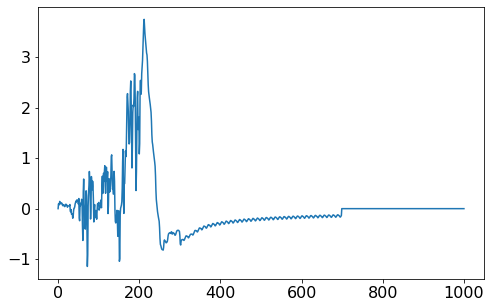

In [489]:
plt.plot(Ce)

In [491]:
# Pre-industrial: 282.87K

sa = 1
Ts = 282.9
Cs = 275.5

Q0 = 342.5
p = 0.3
# outgoing radiation linearized
kappa = 1.74
Tkappa = 154
## CO2 radiative forcing
# Greenhouse effect parameter
B = 5.35

alphaland = 0.28
bP = 0.05
sigma_P = 0.000
bB = 0.08
sigma_B = 0.0
cod = 0. # 2.5563471547779937 #3.035
cearth = 0.107
# cearth = 10.
tauc = 20
coc0 = 0. #350
## Ocean albedo parameters
Talphaocean_low = 219
Talphaocean_high = 299
alphaocean_max = 0.84
alphaocean_min = 0.255

Cbio_low = 50
Cbio_high = 700

T0 = 298
C0 = 280

## CO2 uptake by vegetation
wa = 0.015
vegcover = 0.4

Thigh = 315
Tlow = 282
Topt1 = 295
Topt2 = 310
acc = 5

## Volcanism
Volcan = 0.028


# def alphaocean(T):
#     """T, matrix, (nT, nC, nF)"""
#     temp = np.zeros(T.shape)
#     temp[ T< Talphaocean_low ] = alphaocean_max
#     temp[ (T>= Talphaocean_low)&(T< Talphaocean_high)] = alphaocean_max + (alphaocean_min - alphaocean_max) / (Talphaocean_high - Talphaocean_low) * (T[(T>= Talphaocean_low)&(T< Talphaocean_high)] - Talphaocean_low)
#     temp[T>= Talphaocean_high] = alphaocean_min

#     return temp

# alphaocean = (0.255 + 0.37 ) /2.
alphaocean = 0.3444045881126172

#Fraction of ocean covered by ice
# def fracseaice(T):
    
#     temp = np.zeros(T.shape)
#     temp[ T< Talphaocean_low ] = 1
#     temp[ (T>= Talphaocean_low)&(T< Talphaocean_high)] = 1 - 1 / (Talphaocean_high - Talphaocean_low) * (T[(T>= Talphaocean_low)&(T< Talphaocean_high)] - Talphaocean_low)
#     temp[T>= Talphaocean_high] = 0

#     return temp
    
fracseaice = 0.15
# fracseaice = 0.1


def biopump(F):
    """F, accumulated anthrpogenic emission"""
    temp = np.zeros(F.shape)
    
    temp[F < Cbio_low] = 1
    temp[(F >= Cbio_low)&(F < Cbio_high)] = 1 - 1/(Cbio_high - Cbio_low) * (F[(F >= Cbio_low)&(F < Cbio_high)] - Cbio_low)
    temp[F >= Cbio_high] = 0
    return temp


def veggrowth(T):
    
    temp = np.zeros(T.shape)
    
    temp[T < Tlow] = 0
    temp[(T >= Tlow)&(T < Topt1)] = acc / (Topt1 - Tlow) * (T[(T >= Tlow)&(T < Topt1)] - Tlow)
    temp[(T >= Topt1)&(T < Topt2)] = acc
    temp[(T >= Topt2)&(T < Thigh)] = acc / (Topt2 - Thigh) * (T[(T >= Topt2)&(T < Thigh)] - Thigh)
    temp[T > Thigh] = 0
    
    return temp


#Incoming radiation modified by albedo
# def Ri(T):
#     return 1/cearth * (Q0 * (1 - p * alphaland - (1 - p) * alphaocean) )

Ri = 1 / cearth * Q0 * (1 - p * alphaland - (1 - p) * alphaocean)

# Outgoing radiation modified by greenhouse effect
def Ro(T, C):
    return 1/cearth * (kappa * (T - Tkappa) -  B * np.log(C / C0))

#Solubility of atmospheric carbon into the oceans
# carbon pumps
def kappaP(T, W):
    return np.exp(-(bP + sigma_P * W) * (T - T0))

def oceanatmphysflux(T, W):
    return 1 / tauc * (coc0 * (np.exp(-(bP + sigma_P * W) * (T - T0))))

def oceanbioflux(T, W, sa):
    
    if sa == 1:
        
        return 1/tauc * (coc0 * (np.exp( (bB + sigma_B * W) * (T - T0))))
    
    elif sa == 0:
        
        return 1/tauc * (coc0 * (np.exp(bB * (T - T0))))
    
    else:
        return ValueError("Wrong input value: 0 or 1.")

def oceanatmcorrflux(C):
    return 1 / tauc * (- cod * C)

In [504]:
def dydt(t, y):
    T = y[0]
    C = y[1]

    dT = 1. / cearth * ( - kappa * T + B * np.log(C + C0) - B * np.log(C0))
#     dT -= Ro(T, C)
    Ws = np.random.normal(size=(2,1))
#     dC = Volcan
    dC = Yam(t) - (Volcan / C_preindustrial * C + (1 - fracseaice) * cod / tauc * C) + coc0 / tauc * (1 - fracseaice) * (np.exp(-bP * (T + T_preindustrial - T0) - np.exp(-bP * (T_preindustrial - T0)))) + coc0 / tauc * (1 - fracseaice) * (np.exp(bB * (T + T_preindustrial - T0) - np.exp(bB * (T_preindustrial - T0))))   # biological pump flux * fraction sea ice
#     dC += oceanbioflux(T) * (1 - fracseaice(T))      # biological pump flux * fraction sea ice
#     dC += oceanatmcorrflux(C) * (1 - fracseaice)    # correction parameter

    return dT, dC

In [505]:
T_preindustrial = 286.85
C_preindustrial = 280
(1  - kappa / Q0 * (T_preindustrial - Tkappa) - p * alphaland ) / (1 - p) 

0.3444045881126172

In [494]:
Volcan - wa * vegcover * C_preindustrial + (1 - fracseaice) * coc0 / tauc * (np.exp(-bP * (T_preindustrial - T0)) + np.exp(bB * (T_preindustrial - T0))) - cod / tauc * C_preindustrial * (1 - fracseaice)

-1.652

In [495]:
Q0 * (1 - p * alphaland - (1 - p) * alphaocean) - kappa * (T_preindustrial - Tkappa) 

-2.842170943040401e-14

In [496]:
wa * vegcover

0.006

In [497]:
LHS = - Volcan + wa * C_preindustrial * vegcover

RHS  = coc0 / tauc * np.exp(-bP * (T_preindustrial - T0)) + coc0 / tauc * np.exp(bB * (T_preindustrial - T0)) 
temp = - cod / tauc * C_preindustrial

- LHS, RHS, ( RHS * (1-0.15) + Volcan ) / C_preindustrial

(-1.6520000000000001, 0.0, 0.0001)

In [498]:
(- LHS + RHS * (1 - 0.15)) / (1 - 0.15) * tauc / C_preindustrial

-0.1388235294117647

In [506]:
# init = [Ts, Cs]
init = [0,0]
t_eval = np.linspace(0, 1000, 100000)
sol = solve_ivp(dydt, t_eval[[0, -1]], init, t_eval=t_eval, method='RK45', max_step=0.1)

In [507]:
#Extract values of temperature and C02
Tv = sol.y[0, :]
Cv = sol.y[1, :]
tv = sol.t

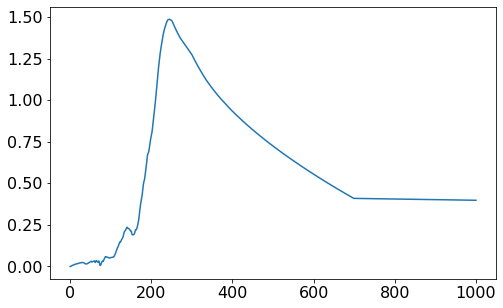

In [508]:
plt.plot(tv, Tv )#- 282.86880986118945)
# plt.xlim(0,100)
# plt.ylim(-10, 0)

In [510]:
# np.save("data_30.npy", [tv, Tv, Cv])

Text(0.5, 0, 'Years')

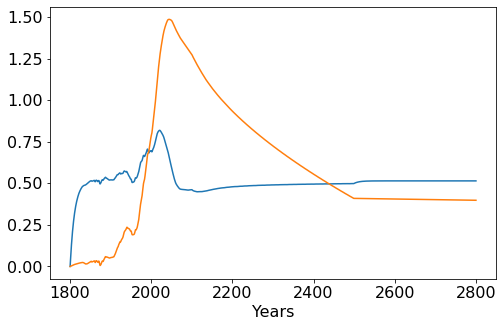

In [511]:
res30 = np.load("data_30.npy")
res45 = np.load("data_45.npy")
res60 = np.load("data_60.npy")
res85 = np.load("data_85.npy")

plt.plot(res30[0] + 1800, res30[1])
plt.plot(tv + 1800, Tv)
# plt.plot(res45[0] + 1800, res45[1])
# plt.plot(res60[0] + 1800, res60[1])
# plt.plot(res85[0] + 1800, res85[1])
plt.xlabel("Years")

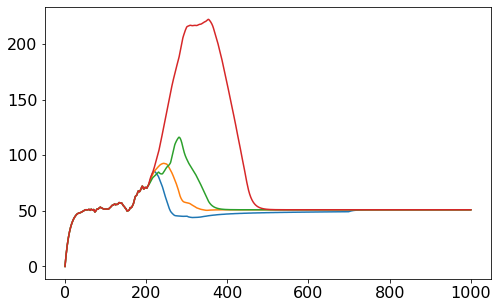

In [512]:
res30 = np.load("data_30.npy")
res45 = np.load("data_45.npy")
res60 = np.load("data_60.npy")
res85 = np.load("data_85.npy")

plt.plot(res30[0], res30[2])
plt.plot(res45[0], res45[2])
plt.plot(res60[0], res60[2])
plt.plot(res85[0], res85[2])

In [724]:
# Economic paramaters
gamma_1 = 1.7675 / 10000.
gamma_2 = 2 * 0.0022
delta   = 0.01
eta     = 0.032

# State variable
# Temperature anomaly, in celsius
T_min  = 0. 
T_max  = 5. # 
hT     = 0.1
T_grid = np.arange(T_min, T_max + hT, hT)

# atmospheric carbon concentration, in gigaton
C_min  = 0.
C_max  = 500.
hC     = 5.
C_grid = np.arange(C_min, C_max + hC, hC)

# F, Sa in the notes, accumulative anthropogenic carbon, in gigaton
F_min = 10. # 10. avaoid 
F_max = 2500. # 2500 x2.13 gm # # on hold -> 4000 / 2.13 ppm
hF = 50.
F_grid = np.arange(F_min, F_max + hF, hF)

# meshgrid
(T_mat, C_mat) = np.meshgrid(T_grid, C_grid, indexing="ij")
stateSpace = np.hstack([
    T_mat.reshape(-1, 1, order="F"),
    C_mat.reshape(-1, 1, order="F"),
#     F_mat.reshape(-1, 1, order="F")
])

T_mat.shape

(51, 101)

In [750]:
# v0 =  - eta * delta * C_mat

# v0 =  delta * eta * np.log(delta /4 * (9000/2.13 - F_mat)) + (eta - 1) * gamma_2 * T_mat / cearth * (B * np.log(C_mat/ C0) + kappa * (T_mat + To - Tkappa))

dG  = gamma_1 + gamma_2 * T_mat
epsilon  = 0.1
count    = 0
error    = 1.
tol      = 1e-8
max_iter = 6000
fraction = 0.1
cearth = 0.107
# cearth = 10.

while error > tol and count < max_iter:
    
    dvdT  = finiteDiff(v0, 0, 1, hT)
    dvdTT = finiteDiff(v0, 0, 2, hT)
    dvdC  = finiteDiff(v0, 1, 1, hC)
#     dvdC[dvdC >= - 1e-16] = - 1e-16
    dvdCC = finiteDiff(v0, 1, 2, hC)
#     dvdF  = finiteDiff(v0, 2, 1, hF)
#     dvdFF = finiteDiff(v0, 2, 2, hF)
        

    Ca = - eta * delta / dvdC

    
    if count >=1:
        Ca = Ca * fraction + Ca_star * (1 - fraction)

    
    Ca[Ca <= 1e-16] = 1e-16
    
#     Ca = 1. * np.ones(T_mat.shape)
    
    A  = - delta * np.ones(T_mat.shape)
    B1 = 1. / cearth * ( - 2 * kappa * T_mat + B * np.log(C_mat + C0) - B * np.log(C0))
    B2 = Ca # - Volcan / C_preindustrial  * C_mat # - ( (1 - fracseaice) * cod / tauc) * C_mat + coc0 / tauc * (1 - fracseaice) * (np.exp( bB * (T_mat + T_preindustrial - T0)) - np.exp( bB * (T_preindustrial - T0))) + coc0 / tauc * (1 - fracseaice) * (np.exp(-bP * (T_mat + T_preindustrial - T0)) - np.exp(-bP * (T_preindustrial - T0)))
    C1 = 0.0 * np.ones(T_mat.shape)
    C2 = 0.0 * np.ones(T_mat.shape)
    D  = eta * delta * np.log(Ca) + (eta - 1) * dG * B1

    out = PDESolver(stateSpace, A, B1, B2, C1, C2, D, v0, epsilon)
    v = out[2].reshape(v0.shape, order="F")

    rhs_error = A * v0 + B1 * dvdT + B2 * dvdC + C1 * dvdTT + C2 * dvdCC + D
    rhs_error = np.max(abs(rhs_error))
    lhs_error = np.max(abs((v - v0)/epsilon))

    error = lhs_error
    v0 = v
    Ca_star = Ca
    count += 1

    print("Iteration: %s;\t False Transient Error: %s;\t PDE Error: %s\t" % (count, lhs_error, rhs_error))

print("Total iteration: %s;\t LHS Error: %s;\t RHS Error %s\t" % (count, lhs_error, rhs_error))

Iteration: 1;	 False Transient Error: 5.4810669647478716e-05;	 PDE Error: 0.03393365185752373	
Iteration: 2;	 False Transient Error: 5.4757306983399534e-05;	 PDE Error: 0.03393365151570604	
Iteration: 3;	 False Transient Error: 5.47049781087286e-05;	 PDE Error: 0.033933651655276176	
Iteration: 4;	 False Transient Error: 5.4652990031274495e-05;	 PDE Error: 0.0339336543121016	
Iteration: 5;	 False Transient Error: 5.4601125581612425e-05;	 PDE Error: 0.03393365859693054	
Iteration: 6;	 False Transient Error: 5.454938080283814e-05;	 PDE Error: 0.033933663414934756	
Iteration: 7;	 False Transient Error: 5.449773932743665e-05;	 PDE Error: 0.03393366815969179	
Iteration: 8;	 False Transient Error: 5.444617020851361e-05;	 PDE Error: 0.03393367260930402	
Iteration: 9;	 False Transient Error: 5.439467739926096e-05;	 PDE Error: 0.033933676718668426	
Iteration: 10;	 False Transient Error: 5.4343244522692125e-05;	 PDE Error: 0.03393368051094736	
Iteration: 11;	 False Transient Error: 5.429186256636

Iteration: 87;	 False Transient Error: 5.0534362008095024e-05;	 PDE Error: 0.033933908121575485	
Iteration: 88;	 False Transient Error: 5.04867883206056e-05;	 PDE Error: 0.033933911191477595	
Iteration: 89;	 False Transient Error: 5.043926192070669e-05;	 PDE Error: 0.0339339142626085	
Iteration: 90;	 False Transient Error: 5.039178207003059e-05;	 PDE Error: 0.03393391733519069	
Iteration: 91;	 False Transient Error: 5.034434902455309e-05;	 PDE Error: 0.03393392040935472	
Iteration: 92;	 False Transient Error: 5.029696342737089e-05;	 PDE Error: 0.033933923485739204	
Iteration: 93;	 False Transient Error: 5.024964043413849e-05;	 PDE Error: 0.03393392656344796	
Iteration: 94;	 False Transient Error: 5.0202338775715005e-05;	 PDE Error: 0.033933929659146767	
Iteration: 95;	 False Transient Error: 5.015508996446261e-05;	 PDE Error: 0.033933932747858275	
Iteration: 96;	 False Transient Error: 5.0107892365855444e-05;	 PDE Error: 0.03393393583676341	
Iteration: 97;	 False Transient Error: 5.006

Iteration: 173;	 False Transient Error: 4.6644540747375896e-05;	 PDE Error: 0.0339341920091738	
Iteration: 174;	 False Transient Error: 4.660106688036958e-05;	 PDE Error: 0.03393419504477979	
Iteration: 175;	 False Transient Error: 4.6557636886185305e-05;	 PDE Error: 0.03393419807499054	
Iteration: 176;	 False Transient Error: 4.6514251004145524e-05;	 PDE Error: 0.03393420110008849	
Iteration: 177;	 False Transient Error: 4.6470900155193284e-05;	 PDE Error: 0.03393420411980008	
Iteration: 178;	 False Transient Error: 4.642759353322423e-05;	 PDE Error: 0.03393420713510098	
Iteration: 179;	 False Transient Error: 4.63843246489154e-05;	 PDE Error: 0.033934210145642574	
Iteration: 180;	 False Transient Error: 4.634110154874693e-05;	 PDE Error: 0.03393421315132494	
Iteration: 181;	 False Transient Error: 4.6297913385839884e-05;	 PDE Error: 0.03393421615200776	
Iteration: 182;	 False Transient Error: 4.6254767494188775e-05;	 PDE Error: 0.033934219148645806	
Iteration: 183;	 False Transient E

Iteration: 260;	 False Transient Error: 4.30120311761123e-05;	 PDE Error: 0.03393443926727713	
Iteration: 261;	 False Transient Error: 4.2971980726766446e-05;	 PDE Error: 0.03393444191810291	
Iteration: 262;	 False Transient Error: 4.293196787123754e-05;	 PDE Error: 0.033934444565245414	
Iteration: 263;	 False Transient Error: 4.289199250710751e-05;	 PDE Error: 0.033934447210331786	
Iteration: 264;	 False Transient Error: 4.285205487300492e-05;	 PDE Error: 0.033934449849324366	
Iteration: 265;	 False Transient Error: 4.281215432132279e-05;	 PDE Error: 0.03393445248440141	
Iteration: 266;	 False Transient Error: 4.2772291273876495e-05;	 PDE Error: 0.03393445511650528	
Iteration: 267;	 False Transient Error: 4.273246561194155e-05;	 PDE Error: 0.033934457746187974	
Iteration: 268;	 False Transient Error: 4.2692677545141944e-05;	 PDE Error: 0.03393446037028891	
Iteration: 269;	 False Transient Error: 4.2652926547648295e-05;	 PDE Error: 0.033934462991517034	
Iteration: 270;	 False Transient

Iteration: 348;	 False Transient Error: 3.96272768461714e-05;	 PDE Error: 0.03393466005384527	
Iteration: 349;	 False Transient Error: 3.9590318614383946e-05;	 PDE Error: 0.03393466245800969	
Iteration: 350;	 False Transient Error: 3.9553439572541024e-05;	 PDE Error: 0.03393466483335805	
Iteration: 351;	 False Transient Error: 3.951660265789393e-05;	 PDE Error: 0.03393466720881211	
Iteration: 352;	 False Transient Error: 3.9479810668265405e-05;	 PDE Error: 0.03393466958363067	
Iteration: 353;	 False Transient Error: 3.9443059333260644e-05;	 PDE Error: 0.033934671956981965	
Iteration: 354;	 False Transient Error: 3.940634353716277e-05;	 PDE Error: 0.03393467432884201	
Iteration: 355;	 False Transient Error: 3.9369661883406626e-05;	 PDE Error: 0.033934676698715194	
Iteration: 356;	 False Transient Error: 3.9333014444642433e-05;	 PDE Error: 0.03393467906632974	
Iteration: 357;	 False Transient Error: 3.929640079829155e-05;	 PDE Error: 0.0339346814312238	
Iteration: 358;	 False Transient E

Iteration: 435;	 False Transient Error: 3.6543036063541035e-05;	 PDE Error: 0.03393485712693911	
Iteration: 436;	 False Transient Error: 3.650901649207561e-05;	 PDE Error: 0.03393485926887152	
Iteration: 437;	 False Transient Error: 3.647502902763555e-05;	 PDE Error: 0.0339348614078232	
Iteration: 438;	 False Transient Error: 3.6441072876480796e-05;	 PDE Error: 0.03393486354414277	
Iteration: 439;	 False Transient Error: 3.6407148448214244e-05;	 PDE Error: 0.03393486567801318	
Iteration: 440;	 False Transient Error: 3.637325523331292e-05;	 PDE Error: 0.033934867809141345	
Iteration: 441;	 False Transient Error: 3.633939381360307e-05;	 PDE Error: 0.033934869937404244	
Iteration: 442;	 False Transient Error: 3.630556357846204e-05;	 PDE Error: 0.033934872062901356	
Iteration: 443;	 False Transient Error: 3.627176472245641e-05;	 PDE Error: 0.03393487418566954	
Iteration: 444;	 False Transient Error: 3.623799743404654e-05;	 PDE Error: 0.03393487630519498	
Iteration: 445;	 False Transient Er

Iteration: 521;	 False Transient Error: 3.37298002706099e-05;	 PDE Error: 0.033935031879349875	
Iteration: 522;	 False Transient Error: 3.369839076582115e-05;	 PDE Error: 0.033935033806221426	
Iteration: 523;	 False Transient Error: 3.366700932434796e-05;	 PDE Error: 0.03393503573051282	
Iteration: 524;	 False Transient Error: 3.3635657917460704e-05;	 PDE Error: 0.03393503765228356	
Iteration: 525;	 False Transient Error: 3.360433465292301e-05;	 PDE Error: 0.03393503957148969	
Iteration: 526;	 False Transient Error: 3.3573041455930985e-05;	 PDE Error: 0.0339350414888111	
Iteration: 527;	 False Transient Error: 3.354177607127473e-05;	 PDE Error: 0.033935043403628296	
Iteration: 528;	 False Transient Error: 3.351054040701129e-05;	 PDE Error: 0.03393504531647684	
Iteration: 529;	 False Transient Error: 3.34793336360939e-05;	 PDE Error: 0.03393504722750107	
Iteration: 530;	 False Transient Error: 3.344815540921864e-05;	 PDE Error: 0.03393504913574974	
Iteration: 531;	 False Transient Error

Iteration: 606;	 False Transient Error: 3.116116742009345e-05;	 PDE Error: 0.03393518797512041	
Iteration: 607;	 False Transient Error: 3.113213544708726e-05;	 PDE Error: 0.03393518972465959	
Iteration: 608;	 False Transient Error: 3.110313072811344e-05;	 PDE Error: 0.033935191471591075	
Iteration: 609;	 False Transient Error: 3.107415322452234e-05;	 PDE Error: 0.03393519321671201	
Iteration: 610;	 False Transient Error: 3.1045202954008144e-05;	 PDE Error: 0.0339351949600144	
Iteration: 611;	 False Transient Error: 3.101627980679755e-05;	 PDE Error: 0.03393519670127043	
Iteration: 612;	 False Transient Error: 3.09873833435198e-05;	 PDE Error: 0.03393519844133719	
Iteration: 613;	 False Transient Error: 3.095851282289286e-05;	 PDE Error: 0.03393520017942997	
Iteration: 614;	 False Transient Error: 3.0929669255011505e-05;	 PDE Error: 0.033935201914732094	
Iteration: 615;	 False Transient Error: 3.0900852493118136e-05;	 PDE Error: 0.033935203648999934	
Iteration: 616;	 False Transient Err

Iteration: 693;	 False Transient Error: 2.8733365897773422e-05;	 PDE Error: 0.03393533341529009	
Iteration: 694;	 False Transient Error: 2.870662542779623e-05;	 PDE Error: 0.03393533501128054	
Iteration: 695;	 False Transient Error: 2.867985470653145e-05;	 PDE Error: 0.033935336584414166	
Iteration: 696;	 False Transient Error: 2.8653099354916667e-05;	 PDE Error: 0.03393533820821126	
Iteration: 697;	 False Transient Error: 2.8626385842056568e-05;	 PDE Error: 0.03393533979670238	
Iteration: 698;	 False Transient Error: 2.8599697741854557e-05;	 PDE Error: 0.03393534138284071	
Iteration: 699;	 False Transient Error: 2.8573077085480847e-05;	 PDE Error: 0.03393534296941114	
Iteration: 700;	 False Transient Error: 2.854643095490106e-05;	 PDE Error: 0.033935344531812905	
Iteration: 701;	 False Transient Error: 2.85197983312252e-05;	 PDE Error: 0.03393534614703553	
Iteration: 702;	 False Transient Error: 2.8493207638174978e-05;	 PDE Error: 0.03393534772666218	
Iteration: 703;	 False Transient 

Iteration: 781;	 False Transient Error: 2.6468800958454053e-05;	 PDE Error: 0.03393546767058897	
Iteration: 782;	 False Transient Error: 2.644411262381352e-05;	 PDE Error: 0.03393546912843881	
Iteration: 783;	 False Transient Error: 2.641944732942325e-05;	 PDE Error: 0.0339354705836068	
Iteration: 784;	 False Transient Error: 2.6394805329663096e-05;	 PDE Error: 0.033935472038617576	
Iteration: 785;	 False Transient Error: 2.637018568299454e-05;	 PDE Error: 0.033935473490930956	
Iteration: 786;	 False Transient Error: 2.6345588553591814e-05;	 PDE Error: 0.03393547494068416	
Iteration: 787;	 False Transient Error: 2.6321015539274017e-05;	 PDE Error: 0.033935476390098085	
Iteration: 788;	 False Transient Error: 2.629646379828654e-05;	 PDE Error: 0.03393547784022255	
Iteration: 789;	 False Transient Error: 2.6271934983959633e-05;	 PDE Error: 0.03393547928643326	
Iteration: 790;	 False Transient Error: 2.624742978081518e-05;	 PDE Error: 0.03393548073041419	
Iteration: 791;	 False Transient 

Iteration: 867;	 False Transient Error: 2.4427039933966332e-05;	 PDE Error: 0.03393558766138227	
Iteration: 868;	 False Transient Error: 2.4404242337863757e-05;	 PDE Error: 0.03393558899593829	
Iteration: 869;	 False Transient Error: 2.438146606220659e-05;	 PDE Error: 0.033935590326969134	
Iteration: 870;	 False Transient Error: 2.435870955212749e-05;	 PDE Error: 0.03393559165979454	
Iteration: 871;	 False Transient Error: 2.4335975707737156e-05;	 PDE Error: 0.03393559298808979	
Iteration: 872;	 False Transient Error: 2.431326223163721e-05;	 PDE Error: 0.03393559431717552	
Iteration: 873;	 False Transient Error: 2.429056902349125e-05;	 PDE Error: 0.0339355956452434	
Iteration: 874;	 False Transient Error: 2.4267898486307615e-05;	 PDE Error: 0.033935596969343784	
Iteration: 875;	 False Transient Error: 2.424524750632706e-05;	 PDE Error: 0.03393559829544879	
Iteration: 876;	 False Transient Error: 2.4222617676233904e-05;	 PDE Error: 0.03393559961822712	
Iteration: 877;	 False Transient E

Iteration: 953;	 False Transient Error: 2.254162984841046e-05;	 PDE Error: 0.03393569782188921	
Iteration: 954;	 False Transient Error: 2.2520578258078405e-05;	 PDE Error: 0.033935699051459434	
Iteration: 955;	 False Transient Error: 2.249954595544279e-05;	 PDE Error: 0.033935700280840475	
Iteration: 956;	 False Transient Error: 2.247853329979954e-05;	 PDE Error: 0.03393570150811742	
Iteration: 957;	 False Transient Error: 2.245754029503444e-05;	 PDE Error: 0.03393570273450486	
Iteration: 958;	 False Transient Error: 2.2436566227759802e-05;	 PDE Error: 0.03393570396110768	
Iteration: 959;	 False Transient Error: 2.2415611871384744e-05;	 PDE Error: 0.03393570518529199	
Iteration: 960;	 False Transient Error: 2.239467732888245e-05;	 PDE Error: 0.03393570640754717	
Iteration: 961;	 False Transient Error: 2.237376136755842e-05;	 PDE Error: 0.03393570763086107	
Iteration: 962;	 False Transient Error: 2.235286523606661e-05;	 PDE Error: 0.03393570885040864	
Iteration: 963;	 False Transient Er

Iteration: 1038;	 False Transient Error: 2.082011504422887e-05;	 PDE Error: 0.03393579810142411	
Iteration: 1039;	 False Transient Error: 2.08006587208015e-05;	 PDE Error: 0.03393579922772094	
Iteration: 1040;	 False Transient Error: 2.0781219596810452e-05;	 PDE Error: 0.033935800354168766	
Iteration: 1041;	 False Transient Error: 2.076179923544974e-05;	 PDE Error: 0.033935801476591365	
Iteration: 1042;	 False Transient Error: 2.074239677199441e-05;	 PDE Error: 0.03393580259825102	
Iteration: 1043;	 False Transient Error: 2.0723012693346643e-05;	 PDE Error: 0.03393580371839544	
Iteration: 1044;	 False Transient Error: 2.0703645501121692e-05;	 PDE Error: 0.03393580484031622	
Iteration: 1045;	 False Transient Error: 2.0684296977019345e-05;	 PDE Error: 0.03393580595817891	
Iteration: 1046;	 False Transient Error: 2.0664966401268137e-05;	 PDE Error: 0.03393580707384114	
Iteration: 1047;	 False Transient Error: 2.0645654060513774e-05;	 PDE Error: 0.033935808189020644	
Iteration: 1048;	 Fals

Iteration: 1124;	 False Transient Error: 1.9211094060972433e-05;	 PDE Error: 0.033935890689444026	
Iteration: 1125;	 False Transient Error: 1.9193129670372344e-05;	 PDE Error: 0.03393589172232625	
Iteration: 1126;	 False Transient Error: 1.9175181059857827e-05;	 PDE Error: 0.03393589275680098	
Iteration: 1127;	 False Transient Error: 1.9157249606452376e-05;	 PDE Error: 0.03393589378725448	
Iteration: 1128;	 False Transient Error: 1.913933500276299e-05;	 PDE Error: 0.03393589481852066	
Iteration: 1129;	 False Transient Error: 1.9121436213437315e-05;	 PDE Error: 0.03393589585080692	
Iteration: 1130;	 False Transient Error: 1.91035547606605e-05;	 PDE Error: 0.033935896880431304	
Iteration: 1131;	 False Transient Error: 1.9085689682077356e-05;	 PDE Error: 0.033935897907984014	
Iteration: 1132;	 False Transient Error: 1.9067841338718527e-05;	 PDE Error: 0.0339358989366878	
Iteration: 1133;	 False Transient Error: 1.905000895661979e-05;	 PDE Error: 0.03393589996551505	
Iteration: 1134;	 Fals

Iteration: 1210;	 False Transient Error: 1.772547334029373e-05;	 PDE Error: 0.03393597706513951	
Iteration: 1211;	 False Transient Error: 1.7708886808145974e-05;	 PDE Error: 0.033935978038053705	
Iteration: 1212;	 False Transient Error: 1.7692315882611442e-05;	 PDE Error: 0.03393597901046164	
Iteration: 1213;	 False Transient Error: 1.7675759678287273e-05;	 PDE Error: 0.0339359799839265	
Iteration: 1214;	 False Transient Error: 1.765921955054761e-05;	 PDE Error: 0.03393598095321604	
Iteration: 1215;	 False Transient Error: 1.7642693902544804e-05;	 PDE Error: 0.03393598192497205	
Iteration: 1216;	 False Transient Error: 1.762618409520411e-05;	 PDE Error: 0.033935982894383265	
Iteration: 1217;	 False Transient Error: 1.7609689785050286e-05;	 PDE Error: 0.033935983862793506	
Iteration: 1218;	 False Transient Error: 1.7593210651922764e-05;	 PDE Error: 0.03393598482833138	
Iteration: 1219;	 False Transient Error: 1.7576746734124238e-05;	 PDE Error: 0.03393598579574686	
Iteration: 1220;	 Fal

Iteration: 1296;	 False Transient Error: 1.635385816066426e-05;	 PDE Error: 0.03393605678310596	
Iteration: 1297;	 False Transient Error: 1.6338544761712592e-05;	 PDE Error: 0.03393605765252117	
Iteration: 1298;	 False Transient Error: 1.6323245672841824e-05;	 PDE Error: 0.033936058518580836	
Iteration: 1299;	 False Transient Error: 1.6307960740147287e-05;	 PDE Error: 0.03393605938494515	
Iteration: 1300;	 False Transient Error: 1.6292689792654635e-05;	 PDE Error: 0.033936060250345346	
Iteration: 1301;	 False Transient Error: 1.6277433429537358e-05;	 PDE Error: 0.0339360611125219	
Iteration: 1302;	 False Transient Error: 1.6262190913815533e-05;	 PDE Error: 0.03393606197481969	
Iteration: 1303;	 False Transient Error: 1.6246962553159716e-05;	 PDE Error: 0.03393606283552675	
Iteration: 1304;	 False Transient Error: 1.6231748428269244e-05;	 PDE Error: 0.0339360636926056	
Iteration: 1305;	 False Transient Error: 1.6216548638786632e-05;	 PDE Error: 0.03393606454930076	
Iteration: 1306;	 Fal

Iteration: 1382;	 False Transient Error: 1.5087565793173163e-05;	 PDE Error: 0.033936126584745985	
Iteration: 1383;	 False Transient Error: 1.5073428733872185e-05;	 PDE Error: 0.033936127350532086	
Iteration: 1384;	 False Transient Error: 1.5059304768888504e-05;	 PDE Error: 0.03393612811597668	
Iteration: 1385;	 False Transient Error: 1.5045193932083922e-05;	 PDE Error: 0.03393612888090036	
Iteration: 1386;	 False Transient Error: 1.5031096381387665e-05;	 PDE Error: 0.03393612964565884	
Iteration: 1387;	 False Transient Error: 1.5017011338255837e-05;	 PDE Error: 0.033936130410839205	
Iteration: 1388;	 False Transient Error: 1.5002939859759534e-05;	 PDE Error: 0.033936131172824346	
Iteration: 1389;	 False Transient Error: 1.498888147814792e-05;	 PDE Error: 0.03393613193541789	
Iteration: 1390;	 False Transient Error: 1.4974836139713954e-05;	 PDE Error: 0.03393613269741946	
Iteration: 1391;	 False Transient Error: 1.4960803792901656e-05;	 PDE Error: 0.03393613345968838	
Iteration: 1392;	

Iteration: 1467;	 False Transient Error: 1.3931639282552255e-05;	 PDE Error: 0.03393619137333026	
Iteration: 1468;	 False Transient Error: 1.3918576485319467e-05;	 PDE Error: 0.03393619215221033	
Iteration: 1469;	 False Transient Error: 1.390552634858433e-05;	 PDE Error: 0.033936192930394515	
Iteration: 1470;	 False Transient Error: 1.3892488158404048e-05;	 PDE Error: 0.03393619370839529	
Iteration: 1471;	 False Transient Error: 1.3879461768367962e-05;	 PDE Error: 0.03393619448919338	
Iteration: 1472;	 False Transient Error: 1.386644784301394e-05;	 PDE Error: 0.03393619526999858	
Iteration: 1473;	 False Transient Error: 1.385344576707026e-05;	 PDE Error: 0.03393619605138731	
Iteration: 1474;	 False Transient Error: 1.3840456093427989e-05;	 PDE Error: 0.03393619683306959	
Iteration: 1475;	 False Transient Error: 1.3827478200986731e-05;	 PDE Error: 0.03393619761657529	
Iteration: 1476;	 False Transient Error: 1.3814512821036518e-05;	 PDE Error: 0.033936198399576956	
Iteration: 1477;	 Fal

Iteration: 1553;	 False Transient Error: 1.2851538935890194e-05;	 PDE Error: 0.033936260637851046	
Iteration: 1554;	 False Transient Error: 1.2839481014978449e-05;	 PDE Error: 0.03393626146114581	
Iteration: 1555;	 False Transient Error: 1.2827434487661105e-05;	 PDE Error: 0.033936262283547514	
Iteration: 1556;	 False Transient Error: 1.2815399316259968e-05;	 PDE Error: 0.03393626310512232	
Iteration: 1557;	 False Transient Error: 1.280337532404141e-05;	 PDE Error: 0.033936263927133226	
Iteration: 1558;	 False Transient Error: 1.279136258310054e-05;	 PDE Error: 0.033936264748690714	
Iteration: 1559;	 False Transient Error: 1.2779360890752267e-05;	 PDE Error: 0.03393626556944129	
Iteration: 1560;	 False Transient Error: 1.2767370516572618e-05;	 PDE Error: 0.03393626639093883	
Iteration: 1561;	 False Transient Error: 1.275539099780676e-05;	 PDE Error: 0.033936267213073634	
Iteration: 1562;	 False Transient Error: 1.2743422990735276e-05;	 PDE Error: 0.03393626803295691	
Iteration: 1563;	 

Iteration: 1640;	 False Transient Error: 1.1843429086125234e-05;	 PDE Error: 0.03393632920575884	
Iteration: 1641;	 False Transient Error: 1.183230934141688e-05;	 PDE Error: 0.033936329929484366	
Iteration: 1642;	 False Transient Error: 1.1821200764650097e-05;	 PDE Error: 0.033936330648328905	
Iteration: 1643;	 False Transient Error: 1.1810102537035405e-05;	 PDE Error: 0.0339363313622183	
Iteration: 1644;	 False Transient Error: 1.1799014428340304e-05;	 PDE Error: 0.03393633207697633	
Iteration: 1645;	 False Transient Error: 1.1787936645968333e-05;	 PDE Error: 0.03393633278999175	
Iteration: 1646;	 False Transient Error: 1.1776869593832506e-05;	 PDE Error: 0.03393633349764036	
Iteration: 1647;	 False Transient Error: 1.176581232845142e-05;	 PDE Error: 0.033936334207048446	
Iteration: 1648;	 False Transient Error: 1.1754765515195609e-05;	 PDE Error: 0.03393633491072379	
Iteration: 1649;	 False Transient Error: 1.174372937673418e-05;	 PDE Error: 0.03393633561157028	
Iteration: 1650;	 Fal

Iteration: 1726;	 False Transient Error: 1.0924081555035992e-05;	 PDE Error: 0.033936381589388276	
Iteration: 1727;	 False Transient Error: 1.091381906459521e-05;	 PDE Error: 0.0339363820726204	
Iteration: 1728;	 False Transient Error: 1.0903566200759496e-05;	 PDE Error: 0.033936382558542366	
Iteration: 1729;	 False Transient Error: 1.0893322937230443e-05;	 PDE Error: 0.03393638303637836	
Iteration: 1730;	 False Transient Error: 1.0883088700994192e-05;	 PDE Error: 0.03393638351802819	
Iteration: 1731;	 False Transient Error: 1.0872864666180981e-05;	 PDE Error: 0.03393638399322052	
Iteration: 1732;	 False Transient Error: 1.0862649888268572e-05;	 PDE Error: 0.0339363844638747	
Iteration: 1733;	 False Transient Error: 1.0852444689846141e-05;	 PDE Error: 0.03393638493592244	
Iteration: 1734;	 False Transient Error: 1.0842248947193212e-05;	 PDE Error: 0.033936385400210156	
Iteration: 1735;	 False Transient Error: 1.0832062392676645e-05;	 PDE Error: 0.03393638586687331	
Iteration: 1736;	 Fa

Iteration: 1813;	 False Transient Error: 1.0066108102682603e-05;	 PDE Error: 0.033936415448266644	
Iteration: 1814;	 False Transient Error: 1.0056645755665561e-05;	 PDE Error: 0.033936415771541384	
Iteration: 1815;	 False Transient Error: 1.0047191797979416e-05;	 PDE Error: 0.033936416089009214	
Iteration: 1816;	 False Transient Error: 1.0037746766278222e-05;	 PDE Error: 0.033936416411201265	
Iteration: 1817;	 False Transient Error: 1.0028310807527752e-05;	 PDE Error: 0.033936416730879326	
Iteration: 1818;	 False Transient Error: 1.0018883408943746e-05;	 PDE Error: 0.03393641704852124	
Iteration: 1819;	 False Transient Error: 1.0009464801799539e-05;	 PDE Error: 0.0339364173691985	
Iteration: 1820;	 False Transient Error: 1.0000055105999217e-05;	 PDE Error: 0.03393641768744615	
Iteration: 1821;	 False Transient Error: 9.990654406127897e-06;	 PDE Error: 0.033936418003347235	
Iteration: 1822;	 False Transient Error: 9.981262093713972e-06;	 PDE Error: 0.033936418321449224	
Iteration: 1823;

Iteration: 1901;	 False Transient Error: 9.266309942482231e-06;	 PDE Error: 0.03393644524526174	
Iteration: 1902;	 False Transient Error: 9.257593418243726e-06;	 PDE Error: 0.033936445645407876	
Iteration: 1903;	 False Transient Error: 9.248885395676809e-06;	 PDE Error: 0.03393644605327317	
Iteration: 1904;	 False Transient Error: 9.240185254721922e-06;	 PDE Error: 0.03393644645739524	
Iteration: 1905;	 False Transient Error: 9.231493373132449e-06;	 PDE Error: 0.03393644687079789	
Iteration: 1906;	 False Transient Error: 9.222809728356984e-06;	 PDE Error: 0.03393644728148937	
Iteration: 1907;	 False Transient Error: 9.214134125204443e-06;	 PDE Error: 0.03393644769686199	
Iteration: 1908;	 False Transient Error: 9.20546632719732e-06;	 PDE Error: 0.03393644811173635	
Iteration: 1909;	 False Transient Error: 9.196806564845672e-06;	 PDE Error: 0.03393644853446354	
Iteration: 1910;	 False Transient Error: 9.18815516046112e-06;	 PDE Error: 0.03393644895726444	
Iteration: 1911;	 False Transie

Iteration: 1988;	 False Transient Error: 8.53764423221215e-06;	 PDE Error: 0.033936491976128025	
Iteration: 1989;	 False Transient Error: 8.529608150550927e-06;	 PDE Error: 0.03393649267366827	
Iteration: 1990;	 False Transient Error: 8.521579732551077e-06;	 PDE Error: 0.033936493375487764	
Iteration: 1991;	 False Transient Error: 8.513558871978133e-06;	 PDE Error: 0.03393649408147681	
Iteration: 1992;	 False Transient Error: 8.505545426168437e-06;	 PDE Error: 0.033936494792034644	
Iteration: 1993;	 False Transient Error: 8.497539489629724e-06;	 PDE Error: 0.03393649550544131	
Iteration: 1994;	 False Transient Error: 8.48954106520694e-06;	 PDE Error: 0.033936496223376356	
Iteration: 1995;	 False Transient Error: 8.481550131597682e-06;	 PDE Error: 0.03393649694582912	
Iteration: 1996;	 False Transient Error: 8.473566675062938e-06;	 PDE Error: 0.03393649767122975	
Iteration: 1997;	 False Transient Error: 8.465590545306267e-06;	 PDE Error: 0.03393649840085988	
Iteration: 1998;	 False Tran

Iteration: 2074;	 False Transient Error: 7.873295930424518e-06;	 PDE Error: 0.03393656621935426	
Iteration: 2075;	 False Transient Error: 7.865880839452721e-06;	 PDE Error: 0.03393656723955507	
Iteration: 2076;	 False Transient Error: 7.858472920244108e-06;	 PDE Error: 0.03393656826274416	
Iteration: 2077;	 False Transient Error: 7.851071595621484e-06;	 PDE Error: 0.033936569288893104	
Iteration: 2078;	 False Transient Error: 7.843677232582946e-06;	 PDE Error: 0.033936570318460646	
Iteration: 2079;	 False Transient Error: 7.836289895868376e-06;	 PDE Error: 0.03393657135104444	
Iteration: 2080;	 False Transient Error: 7.828909388690741e-06;	 PDE Error: 0.03393657238597525	
Iteration: 2081;	 False Transient Error: 7.821535839003246e-06;	 PDE Error: 0.03393657342453382	
Iteration: 2082;	 False Transient Error: 7.814169118297576e-06;	 PDE Error: 0.033936574466400415	
Iteration: 2083;	 False Transient Error: 7.80680935209832e-06;	 PDE Error: 0.03393657551045548	
Iteration: 2084;	 False Tran

Iteration: 2159;	 False Transient Error: 7.267141193395554e-06;	 PDE Error: 0.03393666147387542	
Iteration: 2160;	 False Transient Error: 7.260293040725618e-06;	 PDE Error: 0.03393666266089568	
Iteration: 2161;	 False Transient Error: 7.253451285299528e-06;	 PDE Error: 0.033936663848952886	
Iteration: 2162;	 False Transient Error: 7.246615892839148e-06;	 PDE Error: 0.033936665037345826	
Iteration: 2163;	 False Transient Error: 7.239786907753398e-06;	 PDE Error: 0.03393666622638536	
Iteration: 2164;	 False Transient Error: 7.232964410533449e-06;	 PDE Error: 0.033936667416126554	
Iteration: 2165;	 False Transient Error: 7.226148193636983e-06;	 PDE Error: 0.03393666860606226	
Iteration: 2166;	 False Transient Error: 7.2193384007684935e-06;	 PDE Error: 0.033936669796160945	
Iteration: 2167;	 False Transient Error: 7.212534856790298e-06;	 PDE Error: 0.033936670987679385	
Iteration: 2168;	 False Transient Error: 7.2057378533441074e-06;	 PDE Error: 0.03393667217888652	
Iteration: 2169;	 False

Iteration: 2245;	 False Transient Error: 6.701218435573031e-06;	 PDE Error: 0.03393676217591768	
Iteration: 2246;	 False Transient Error: 6.694900920381497e-06;	 PDE Error: 0.03393676328669715	
Iteration: 2247;	 False Transient Error: 6.688589355985375e-06;	 PDE Error: 0.03393676439455806	
Iteration: 2248;	 False Transient Error: 6.682283688677626e-06;	 PDE Error: 0.03393676550128344	
Iteration: 2249;	 False Transient Error: 6.675983923176698e-06;	 PDE Error: 0.03393676660540468	
Iteration: 2250;	 False Transient Error: 6.6696900458129704e-06;	 PDE Error: 0.03393676770712695	
Iteration: 2251;	 False Transient Error: 6.6634020739336774e-06;	 PDE Error: 0.03393676880678598	
Iteration: 2252;	 False Transient Error: 6.657120021624774e-06;	 PDE Error: 0.03393676990428629	
Iteration: 2253;	 False Transient Error: 6.650843803954198e-06;	 PDE Error: 0.033936770999560384	
Iteration: 2254;	 False Transient Error: 6.644573492670114e-06;	 PDE Error: 0.0339367720924586	
Iteration: 2255;	 False Tran

Iteration: 2332;	 False Transient Error: 6.173306389203881e-06;	 PDE Error: 0.03393684699963195	
Iteration: 2333;	 False Transient Error: 6.167483003888252e-06;	 PDE Error: 0.033936847776902646	
Iteration: 2334;	 False Transient Error: 6.1616656013563365e-06;	 PDE Error: 0.03393684856806134	
Iteration: 2335;	 False Transient Error: 6.155854033532138e-06;	 PDE Error: 0.033936849363926935	
Iteration: 2336;	 False Transient Error: 6.150047585085083e-06;	 PDE Error: 0.03393685015719772	
Iteration: 2337;	 False Transient Error: 6.144246351771909e-06;	 PDE Error: 0.03393685094527621	
Iteration: 2338;	 False Transient Error: 6.138450501166903e-06;	 PDE Error: 0.03393685172786487	
Iteration: 2339;	 False Transient Error: 6.132660073931984e-06;	 PDE Error: 0.033936852503854364	
Iteration: 2340;	 False Transient Error: 6.1268750620180334e-06;	 PDE Error: 0.033936853274092016	
Iteration: 2341;	 False Transient Error: 6.121095472294558e-06;	 PDE Error: 0.033936854038549846	
Iteration: 2342;	 False

Iteration: 2420;	 False Transient Error: 5.681203675417246e-06;	 PDE Error: 0.033936897377904174	
Iteration: 2421;	 False Transient Error: 5.676033773549527e-06;	 PDE Error: 0.033936897698124024	
Iteration: 2422;	 False Transient Error: 5.670667036078436e-06;	 PDE Error: 0.033936897893292794	
Iteration: 2423;	 False Transient Error: 5.665313424149665e-06;	 PDE Error: 0.0339368981144097	
Iteration: 2424;	 False Transient Error: 5.659966270527006e-06;	 PDE Error: 0.03393689837775282	
Iteration: 2425;	 False Transient Error: 5.654624546924387e-06;	 PDE Error: 0.033936898680327676	
Iteration: 2426;	 False Transient Error: 5.649287781296988e-06;	 PDE Error: 0.03393689899404029	
Iteration: 2427;	 False Transient Error: 5.643955995268679e-06;	 PDE Error: 0.03393689930301358	
Iteration: 2428;	 False Transient Error: 5.638629200430123e-06;	 PDE Error: 0.03393689960241231	
Iteration: 2429;	 False Transient Error: 5.633307349275918e-06;	 PDE Error: 0.033936899890879335	
Iteration: 2430;	 False Tr

Iteration: 2508;	 False Transient Error: 5.228258542003261e-06;	 PDE Error: 0.03393690183982301	
Iteration: 2509;	 False Transient Error: 5.223321167466266e-06;	 PDE Error: 0.03393690161721841	
Iteration: 2510;	 False Transient Error: 5.218388424294007e-06;	 PDE Error: 0.03393690138864569	
Iteration: 2511;	 False Transient Error: 5.213460309363982e-06;	 PDE Error: 0.033936901153919674	
Iteration: 2512;	 False Transient Error: 5.208536803247288e-06;	 PDE Error: 0.03393690091308921	
Iteration: 2513;	 False Transient Error: 5.203617917184933e-06;	 PDE Error: 0.03393690066587807	
Iteration: 2514;	 False Transient Error: 5.198703638964464e-06;	 PDE Error: 0.03393690041271258	
Iteration: 2515;	 False Transient Error: 5.193793964769489e-06;	 PDE Error: 0.033936900153184624	
Iteration: 2516;	 False Transient Error: 5.188888898069455e-06;	 PDE Error: 0.03393689988753357	
Iteration: 2517;	 False Transient Error: 5.183988425472297e-06;	 PDE Error: 0.033936899615395255	
Iteration: 2518;	 False Tra

Iteration: 2594;	 False Transient Error: 4.820124069396248e-06;	 PDE Error: 0.033936860629368404	
Iteration: 2595;	 False Transient Error: 4.815569282223819e-06;	 PDE Error: 0.033936859896891214	
Iteration: 2596;	 False Transient Error: 4.81101871618872e-06;	 PDE Error: 0.03393685915928568	
Iteration: 2597;	 False Transient Error: 4.8064723655316666e-06;	 PDE Error: 0.03393685841567429	
Iteration: 2598;	 False Transient Error: 4.801930412329236e-06;	 PDE Error: 0.03393685766613874	
Iteration: 2599;	 False Transient Error: 4.797392730432337e-06;	 PDE Error: 0.03393685691169468	
Iteration: 2600;	 False Transient Error: 4.792859178079367e-06;	 PDE Error: 0.033936856151833616	
Iteration: 2601;	 False Transient Error: 4.788329979882322e-06;	 PDE Error: 0.03393685538569313	
Iteration: 2602;	 False Transient Error: 4.783805059305202e-06;	 PDE Error: 0.033936854614783574	
Iteration: 2603;	 False Transient Error: 4.779284357436797e-06;	 PDE Error: 0.03393685383826339	
Iteration: 2604;	 False Tr

Iteration: 2681;	 False Transient Error: 4.439532669681112e-06;	 PDE Error: 0.033936777430361165	
Iteration: 2682;	 False Transient Error: 4.4353350893422405e-06;	 PDE Error: 0.03393677625755487	
Iteration: 2683;	 False Transient Error: 4.431141442384767e-06;	 PDE Error: 0.033936775080676274	
Iteration: 2684;	 False Transient Error: 4.42695172894747e-06;	 PDE Error: 0.033936773898967765	
Iteration: 2685;	 False Transient Error: 4.4227659477813486e-06;	 PDE Error: 0.03393677271306794	
Iteration: 2686;	 False Transient Error: 4.418584093335287e-06;	 PDE Error: 0.03393677152243724	
Iteration: 2687;	 False Transient Error: 4.414406154437667e-06;	 PDE Error: 0.03393677032700326	
Iteration: 2688;	 False Transient Error: 4.410232140872328e-06;	 PDE Error: 0.03393676912719101	
Iteration: 2689;	 False Transient Error: 4.406062041120706e-06;	 PDE Error: 0.03393676792335043	
Iteration: 2690;	 False Transient Error: 4.401895851990911e-06;	 PDE Error: 0.03393676671502188	
Iteration: 2691;	 False Tr

Iteration: 2767;	 False Transient Error: 4.092598662464031e-06;	 PDE Error: 0.03393666177738419	
Iteration: 2768;	 False Transient Error: 4.088726575854351e-06;	 PDE Error: 0.03393666027315634	
Iteration: 2769;	 False Transient Error: 4.084858123976076e-06;	 PDE Error: 0.03393665876562446	
Iteration: 2770;	 False Transient Error: 4.080993301000535e-06;	 PDE Error: 0.03393665725466333	
Iteration: 2771;	 False Transient Error: 4.077132103180725e-06;	 PDE Error: 0.033936655741010124	
Iteration: 2772;	 False Transient Error: 4.073274502414126e-06;	 PDE Error: 0.03393665422378245	
Iteration: 2773;	 False Transient Error: 4.069420525901202e-06;	 PDE Error: 0.03393665270357582	
Iteration: 2774;	 False Transient Error: 4.065570197095414e-06;	 PDE Error: 0.03393665118011002	
Iteration: 2775;	 False Transient Error: 4.06172348935141e-06;	 PDE Error: 0.03393664965309329	
Iteration: 2776;	 False Transient Error: 4.057880393648627e-06;	 PDE Error: 0.03393664812348174	
Iteration: 2777;	 False Transi

Iteration: 2853;	 False Transient Error: 3.772596432471964e-06;	 PDE Error: 0.033936522011806414	
Iteration: 2854;	 False Transient Error: 3.769024875741045e-06;	 PDE Error: 0.033936520279098215	
Iteration: 2855;	 False Transient Error: 3.7654566714673265e-06;	 PDE Error: 0.03393651854418556	
Iteration: 2856;	 False Transient Error: 3.7618918130588597e-06;	 PDE Error: 0.03393651680715104	
Iteration: 2857;	 False Transient Error: 3.75833030405448e-06;	 PDE Error: 0.033936515067743755	
Iteration: 2858;	 False Transient Error: 3.754772130923345e-06;	 PDE Error: 0.03393651332652814	
Iteration: 2859;	 False Transient Error: 3.7512173022696826e-06;	 PDE Error: 0.03393651158285449	
Iteration: 2860;	 False Transient Error: 3.7476658211466063e-06;	 PDE Error: 0.03393650983708518	
Iteration: 2861;	 False Transient Error: 3.744117679366221e-06;	 PDE Error: 0.03393650808973092	
Iteration: 2862;	 False Transient Error: 3.7405728514627867e-06;	 PDE Error: 0.033936506339994565	
Iteration: 2863;	 Fals

Iteration: 2940;	 False Transient Error: 3.4743061889247473e-06;	 PDE Error: 0.033936364681940834	
Iteration: 2941;	 False Transient Error: 3.4710153965639146e-06;	 PDE Error: 0.03393636281581491	
Iteration: 2942;	 False Transient Error: 3.4677277028355435e-06;	 PDE Error: 0.03393636094856367	
Iteration: 2943;	 False Transient Error: 3.464443096568015e-06;	 PDE Error: 0.03393635908040871	
Iteration: 2944;	 False Transient Error: 3.4611615556262576e-06;	 PDE Error: 0.03393635721145927	
Iteration: 2945;	 False Transient Error: 3.4578831185211323e-06;	 PDE Error: 0.033936355340984825	
Iteration: 2946;	 False Transient Error: 3.4546077564562294e-06;	 PDE Error: 0.03393635347021062	
Iteration: 2947;	 False Transient Error: 3.451335481990947e-06;	 PDE Error: 0.033936351598089054	
Iteration: 2948;	 False Transient Error: 3.4480662718799904e-06;	 PDE Error: 0.03393634972480575	
Iteration: 2949;	 False Transient Error: 3.4448001282744167e-06;	 PDE Error: 0.03393634785059607	
Iteration: 2950;	 F

Iteration: 3024;	 False Transient Error: 3.224350334368742e-06;	 PDE Error: 0.033936192943720744	
Iteration: 3025;	 False Transient Error: 3.2213170768347066e-06;	 PDE Error: 0.033936191310147024	
Iteration: 3026;	 False Transient Error: 3.2182865338653555e-06;	 PDE Error: 0.03393618967444789	
Iteration: 3027;	 False Transient Error: 3.2152589923839514e-06;	 PDE Error: 0.03393618803610243	
Iteration: 3028;	 False Transient Error: 3.212233903038264e-06;	 PDE Error: 0.033936186394906365	
Iteration: 3029;	 False Transient Error: 3.2092119791465867e-06;	 PDE Error: 0.03393618475178828	
Iteration: 3030;	 False Transient Error: 3.206192506211014e-06;	 PDE Error: 0.03393618310503266	
Iteration: 3031;	 False Transient Error: 3.203175973909289e-06;	 PDE Error: 0.03393618145569244	
Iteration: 3032;	 False Transient Error: 3.2001620248883755e-06;	 PDE Error: 0.033936179802991795	
Iteration: 3033;	 False Transient Error: 3.197151101433371e-06;	 PDE Error: 0.03393617814816219	
Iteration: 3034;	 Fal

Iteration: 3110;	 False Transient Error: 2.9734115768176306e-06;	 PDE Error: 0.03393604350279533	
Iteration: 3111;	 False Transient Error: 2.9706088616049398e-06;	 PDE Error: 0.033936041695887376	
Iteration: 3112;	 False Transient Error: 2.9678087043460977e-06;	 PDE Error: 0.033936039887394465	
Iteration: 3113;	 False Transient Error: 2.9650111664503154e-06;	 PDE Error: 0.03393603807859158	
Iteration: 3114;	 False Transient Error: 2.9622161595854735e-06;	 PDE Error: 0.03393603626818731	
Iteration: 3115;	 False Transient Error: 2.9594237505731202e-06;	 PDE Error: 0.03393603445700233	
Iteration: 3116;	 False Transient Error: 2.956633896739058e-06;	 PDE Error: 0.033936032644432235	
Iteration: 3117;	 False Transient Error: 2.953846587258613e-06;	 PDE Error: 0.03393603083117469	
Iteration: 3118;	 False Transient Error: 2.951061885067552e-06;	 PDE Error: 0.033936029016638614	
Iteration: 3119;	 False Transient Error: 2.948279734585335e-06;	 PDE Error: 0.03393602720120281	
Iteration: 3120;	 Fa

Iteration: 3196;	 False Transient Error: 2.7417739317803225e-06;	 PDE Error: 0.033935884545252204	
Iteration: 3197;	 False Transient Error: 2.7391837624513027e-06;	 PDE Error: 0.03393588267444603	
Iteration: 3198;	 False Transient Error: 2.736595936733699e-06;	 PDE Error: 0.03393588080430021	
Iteration: 3199;	 False Transient Error: 2.7340105200612808e-06;	 PDE Error: 0.033935878934310715	
Iteration: 3200;	 False Transient Error: 2.731427512364659e-06;	 PDE Error: 0.033935877063832276	
Iteration: 3201;	 False Transient Error: 2.728846905802884e-06;	 PDE Error: 0.03393587519339647	
Iteration: 3202;	 False Transient Error: 2.7262686864981678e-06;	 PDE Error: 0.03393587332304371	
Iteration: 3203;	 False Transient Error: 2.7236927709062275e-06;	 PDE Error: 0.03393587145300758	
Iteration: 3204;	 False Transient Error: 2.7211195433723967e-06;	 PDE Error: 0.03393586958057293	
Iteration: 3205;	 False Transient Error: 2.718548371208329e-06;	 PDE Error: 0.03393586771246815	
Iteration: 3206;	 Fal

Iteration: 3281;	 False Transient Error: 2.529946819054829e-06;	 PDE Error: 0.03393572706633252	
Iteration: 3282;	 False Transient Error: 2.527552665221311e-06;	 PDE Error: 0.03393572523560673	
Iteration: 3283;	 False Transient Error: 2.5251606616122357e-06;	 PDE Error: 0.033935723405654095	
Iteration: 3284;	 False Transient Error: 2.5227708562447493e-06;	 PDE Error: 0.03393572157613267	
Iteration: 3285;	 False Transient Error: 2.5203834699838445e-06;	 PDE Error: 0.033935719745857185	
Iteration: 3286;	 False Transient Error: 2.517998053952475e-06;	 PDE Error: 0.03393571791820049	
Iteration: 3287;	 False Transient Error: 2.5156148138194556e-06;	 PDE Error: 0.033935716091352486	
Iteration: 3288;	 False Transient Error: 2.513234172857315e-06;	 PDE Error: 0.033935714262271155	
Iteration: 3289;	 False Transient Error: 2.510855254336808e-06;	 PDE Error: 0.03393571243794824	
Iteration: 3290;	 False Transient Error: 2.5084787425022625e-06;	 PDE Error: 0.03393571061220513	
Iteration: 3291;	 Fal

Iteration: 3367;	 False Transient Error: 2.332122304993245e-06;	 PDE Error: 0.033935572625738875	
Iteration: 3368;	 False Transient Error: 2.3299127635545425e-06;	 PDE Error: 0.033935570873279364	
Iteration: 3369;	 False Transient Error: 2.3277054114756446e-06;	 PDE Error: 0.033935569121848363	
Iteration: 3370;	 False Transient Error: 2.3254998179900177e-06;	 PDE Error: 0.033935567371935704	
Iteration: 3371;	 False Transient Error: 2.3232965071923184e-06;	 PDE Error: 0.03393556562274336	
Iteration: 3372;	 False Transient Error: 2.3210949694207894e-06;	 PDE Error: 0.033935563875453045	
Iteration: 3373;	 False Transient Error: 2.3188957067737936e-06;	 PDE Error: 0.03393556212865301	
Iteration: 3374;	 False Transient Error: 2.3166982964645255e-06;	 PDE Error: 0.03393556038371459	
Iteration: 3375;	 False Transient Error: 2.314503021044745e-06;	 PDE Error: 0.03393555863968167	
Iteration: 3376;	 False Transient Error: 2.3123097987048924e-06;	 PDE Error: 0.03393555689712224	
Iteration: 3377;	

Iteration: 3454;	 False Transient Error: 2.147353129824947e-06;	 PDE Error: 0.03393542478952183	
Iteration: 3455;	 False Transient Error: 2.1453175296642923e-06;	 PDE Error: 0.03393542314619635	
Iteration: 3456;	 False Transient Error: 2.143282135241842e-06;	 PDE Error: 0.03393542150361606	
Iteration: 3457;	 False Transient Error: 2.141247997730633e-06;	 PDE Error: 0.03393541986219839	
Iteration: 3458;	 False Transient Error: 2.139262537358133e-06;	 PDE Error: 0.03393541822223112	
Iteration: 3459;	 False Transient Error: 2.137011844436168e-06;	 PDE Error: 0.03393541655118115	
Iteration: 3460;	 False Transient Error: 2.1349013008820084e-06;	 PDE Error: 0.03393541476956985	
Iteration: 3461;	 False Transient Error: 2.132841174160016e-06;	 PDE Error: 0.03393541309796122	
Iteration: 3462;	 False Transient Error: 2.1308045973500445e-06;	 PDE Error: 0.033935411471571975	
Iteration: 3463;	 False Transient Error: 2.128776404458632e-06;	 PDE Error: 0.03393540986482835	
Iteration: 3464;	 False Tr

Iteration: 3538;	 False Transient Error: 1.9822041159855974e-06;	 PDE Error: 0.03393529131967643	
Iteration: 3539;	 False Transient Error: 1.9803174825666625e-06;	 PDE Error: 0.033935289794980505	
Iteration: 3540;	 False Transient Error: 1.9784212898325826e-06;	 PDE Error: 0.03393528828453629	
Iteration: 3541;	 False Transient Error: 1.976505811934759e-06;	 PDE Error: 0.03393528678728286	
Iteration: 3542;	 False Transient Error: 1.974648995220485e-06;	 PDE Error: 0.03393528523688483	
Iteration: 3543;	 False Transient Error: 1.972791393023421e-06;	 PDE Error: 0.03393528367071541	
Iteration: 3544;	 False Transient Error: 1.9709082993077387e-06;	 PDE Error: 0.03393528217555675	
Iteration: 3545;	 False Transient Error: 1.969025075418407e-06;	 PDE Error: 0.033935280681653524	
Iteration: 3546;	 False Transient Error: 1.9671240188753186e-06;	 PDE Error: 0.033935279195119517	
Iteration: 3547;	 False Transient Error: 1.9651598826778832e-06;	 PDE Error: 0.03393527754530368	
Iteration: 3548;	 Fal

Iteration: 3624;	 False Transient Error: 1.8259762000344404e-06;	 PDE Error: 0.033935164787869176	
Iteration: 3625;	 False Transient Error: 1.8242611901642114e-06;	 PDE Error: 0.033935163375608646	
Iteration: 3626;	 False Transient Error: 1.8225125817663765e-06;	 PDE Error: 0.033935161974272265	
Iteration: 3627;	 False Transient Error: 1.820762736267842e-06;	 PDE Error: 0.033935160590623514	
Iteration: 3628;	 False Transient Error: 1.819021784236867e-06;	 PDE Error: 0.03393515916852685	
Iteration: 3629;	 False Transient Error: 1.8172859832937815e-06;	 PDE Error: 0.033935157751074474	
Iteration: 3630;	 False Transient Error: 1.8155521044199707e-06;	 PDE Error: 0.0339351563413004	
Iteration: 3631;	 False Transient Error: 1.8138203614764814e-06;	 PDE Error: 0.033935154934273015	
Iteration: 3632;	 False Transient Error: 1.8120901035256765e-06;	 PDE Error: 0.03393515353219634	
Iteration: 3633;	 False Transient Error: 1.8103616193643202e-06;	 PDE Error: 0.033935152130208035	
Iteration: 3634;

Iteration: 3709;	 False Transient Error: 1.6836221786165062e-06;	 PDE Error: 0.03393504914583234	
Iteration: 3710;	 False Transient Error: 1.6820142142298655e-06;	 PDE Error: 0.03393504783650725	
Iteration: 3711;	 False Transient Error: 1.6804074475657016e-06;	 PDE Error: 0.03393504652973345	
Iteration: 3712;	 False Transient Error: 1.6788021017094534e-06;	 PDE Error: 0.03393504522454416	
Iteration: 3713;	 False Transient Error: 1.677198392946444e-06;	 PDE Error: 0.033935043919663954	
Iteration: 3714;	 False Transient Error: 1.6755962185116546e-06;	 PDE Error: 0.03393504261559688	
Iteration: 3715;	 False Transient Error: 1.6739954961791925e-06;	 PDE Error: 0.03393504131374314	
Iteration: 3716;	 False Transient Error: 1.6723963817966148e-06;	 PDE Error: 0.033935040012362805	
Iteration: 3717;	 False Transient Error: 1.6707987628150622e-06;	 PDE Error: 0.033935038712407994	
Iteration: 3718;	 False Transient Error: 1.6692024811665318e-06;	 PDE Error: 0.033935037414106084	
Iteration: 3719;	

Iteration: 3795;	 False Transient Error: 1.55068613054421e-06;	 PDE Error: 0.03393494100776984	
Iteration: 3796;	 False Transient Error: 1.5492019610902075e-06;	 PDE Error: 0.0339349398009503	
Iteration: 3797;	 False Transient Error: 1.5477196578517205e-06;	 PDE Error: 0.03393493859655061	
Iteration: 3798;	 False Transient Error: 1.5462391147330612e-06;	 PDE Error: 0.0339349373911082	
Iteration: 3799;	 False Transient Error: 1.5447598398360407e-06;	 PDE Error: 0.03393493618690124	
Iteration: 3800;	 False Transient Error: 1.5432816183325038e-06;	 PDE Error: 0.03393493498332356	
Iteration: 3801;	 False Transient Error: 1.5418047303455973e-06;	 PDE Error: 0.033934933782851395	
Iteration: 3802;	 False Transient Error: 1.5403295674371043e-06;	 PDE Error: 0.03393493258246805	
Iteration: 3803;	 False Transient Error: 1.538855732008404e-06;	 PDE Error: 0.03393493138211934	
Iteration: 3804;	 False Transient Error: 1.5373830866693972e-06;	 PDE Error: 0.033934930184320145	
Iteration: 3805;	 False

Iteration: 3880;	 False Transient Error: 1.4294237178635871e-06;	 PDE Error: 0.03393484229968058	
Iteration: 3881;	 False Transient Error: 1.4280539930439096e-06;	 PDE Error: 0.03393484118457968	
Iteration: 3882;	 False Transient Error: 1.4266858838068996e-06;	 PDE Error: 0.03393484007007386	
Iteration: 3883;	 False Transient Error: 1.42531885891084e-06;	 PDE Error: 0.03393483895543792	
Iteration: 3884;	 False Transient Error: 1.4239529481235857e-06;	 PDE Error: 0.03393483784344031	
Iteration: 3885;	 False Transient Error: 1.422588516361567e-06;	 PDE Error: 0.033934836731629225	
Iteration: 3886;	 False Transient Error: 1.4212250006723215e-06;	 PDE Error: 0.03393483561973998	
Iteration: 3887;	 False Transient Error: 1.4198629040562682e-06;	 PDE Error: 0.03393483451203849	
Iteration: 3888;	 False Transient Error: 1.4185021600388037e-06;	 PDE Error: 0.03393483340200776	
Iteration: 3889;	 False Transient Error: 1.4171423590864096e-06;	 PDE Error: 0.03393483229516292	
Iteration: 3890;	 Fals

Iteration: 3964;	 False Transient Error: 1.3187108702933381e-06;	 PDE Error: 0.03393475193892259	
Iteration: 3965;	 False Transient Error: 1.3174450681080474e-06;	 PDE Error: 0.03393475090798237	
Iteration: 3966;	 False Transient Error: 1.3161806877715065e-06;	 PDE Error: 0.03393474987684009	
Iteration: 3967;	 False Transient Error: 1.3149174352827808e-06;	 PDE Error: 0.033934748846796925	
Iteration: 3968;	 False Transient Error: 1.3136551373776895e-06;	 PDE Error: 0.03393474781850703	
Iteration: 3969;	 False Transient Error: 1.3123941342008116e-06;	 PDE Error: 0.033934746790962755	
Iteration: 3970;	 False Transient Error: 1.3111341534699505e-06;	 PDE Error: 0.033934745763454455	
Iteration: 3971;	 False Transient Error: 1.3098752528473145e-06;	 PDE Error: 0.03393474473836422	
Iteration: 3972;	 False Transient Error: 1.3086181099158933e-06;	 PDE Error: 0.03393474371254923	
Iteration: 3973;	 False Transient Error: 1.30736196320147e-06;	 PDE Error: 0.03393474268650509	
Iteration: 3974;	 F

Iteration: 4048;	 False Transient Error: 1.2164261629921125e-06;	 PDE Error: 0.033934668393190925	
Iteration: 4049;	 False Transient Error: 1.2152567233081335e-06;	 PDE Error: 0.03393466743659834	
Iteration: 4050;	 False Transient Error: 1.2140883193234586e-06;	 PDE Error: 0.03393466648090859	
Iteration: 4051;	 False Transient Error: 1.2129211370004445e-06;	 PDE Error: 0.033934665526454744	
Iteration: 4052;	 False Transient Error: 1.2117644722950231e-06;	 PDE Error: 0.03393466457261818	
Iteration: 4053;	 False Transient Error: 1.2105504375130305e-06;	 PDE Error: 0.03393466358569697	
Iteration: 4054;	 False Transient Error: 1.2093740386952614e-06;	 PDE Error: 0.03393466250995836	
Iteration: 4055;	 False Transient Error: 1.208204374711537e-06;	 PDE Error: 0.03393466149117241	
Iteration: 4056;	 False Transient Error: 1.2070400363071998e-06;	 PDE Error: 0.03393466051594274	
Iteration: 4057;	 False Transient Error: 1.2058798059405573e-06;	 PDE Error: 0.03393465955898867	
Iteration: 4058;	 F

Iteration: 4133;	 False Transient Error: 1.1206319162210265e-06;	 PDE Error: 0.033934589953485084	
Iteration: 4134;	 False Transient Error: 1.1195504662220301e-06;	 PDE Error: 0.03393458905700131	
Iteration: 4135;	 False Transient Error: 1.1184710438372214e-06;	 PDE Error: 0.0339345881657338	
Iteration: 4136;	 False Transient Error: 1.117392892449609e-06;	 PDE Error: 0.03393458727769927	
Iteration: 4137;	 False Transient Error: 1.1163159909649556e-06;	 PDE Error: 0.03393458639212543	
Iteration: 4138;	 False Transient Error: 1.1152504625355775e-06;	 PDE Error: 0.03393458550901274	
Iteration: 4139;	 False Transient Error: 1.1140730043004976e-06;	 PDE Error: 0.03393458465429422	
Iteration: 4140;	 False Transient Error: 1.1129418303352373e-06;	 PDE Error: 0.03393458376516412	
Iteration: 4141;	 False Transient Error: 1.112021043234157e-06;	 PDE Error: 0.03393458287617479	
Iteration: 4142;	 False Transient Error: 1.1109407814513528e-06;	 PDE Error: 0.03393458195700294	
Iteration: 4143;	 Fals

Iteration: 4219;	 False Transient Error: 1.0311414543051622e-06;	 PDE Error: 0.03393451700513994	
Iteration: 4220;	 False Transient Error: 1.030145281924466e-06;	 PDE Error: 0.033934516187241304	
Iteration: 4221;	 False Transient Error: 1.0291501274795056e-06;	 PDE Error: 0.033934515370015905	
Iteration: 4222;	 False Transient Error: 1.0281558643354671e-06;	 PDE Error: 0.03393451455335095	
Iteration: 4223;	 False Transient Error: 1.0271624904106824e-06;	 PDE Error: 0.03393451373803469	
Iteration: 4224;	 False Transient Error: 1.0261700945923824e-06;	 PDE Error: 0.03393451292285521	
Iteration: 4225;	 False Transient Error: 1.025178637120705e-06;	 PDE Error: 0.03393451210892273	
Iteration: 4226;	 False Transient Error: 1.0241879711686552e-06;	 PDE Error: 0.03393451129531355	
Iteration: 4227;	 False Transient Error: 1.023198434868533e-06;	 PDE Error: 0.03393451048330709	
Iteration: 4228;	 False Transient Error: 1.0222099301043786e-06;	 PDE Error: 0.033934509670874746	
Iteration: 4229;	 Fa

Iteration: 4306;	 False Transient Error: 9.478476269836333e-07;	 PDE Error: 0.03393444847946636	
Iteration: 4307;	 False Transient Error: 9.469303677983598e-07;	 PDE Error: 0.03393444772681731	
Iteration: 4308;	 False Transient Error: 9.460139716727101e-07;	 PDE Error: 0.033934446974977384	
Iteration: 4309;	 False Transient Error: 9.45098453525306e-07;	 PDE Error: 0.03393444622372055	
Iteration: 4310;	 False Transient Error: 9.441838602630703e-07;	 PDE Error: 0.03393444547325597	
Iteration: 4311;	 False Transient Error: 9.432700962680451e-07;	 PDE Error: 0.0339344447232266	
Iteration: 4312;	 False Transient Error: 9.423572221167742e-07;	 PDE Error: 0.03393444397370615	
Iteration: 4313;	 False Transient Error: 9.414451915268351e-07;	 PDE Error: 0.033934443224851396	
Iteration: 4314;	 False Transient Error: 9.405340461315914e-07;	 PDE Error: 0.033934442477015825	
Iteration: 4315;	 False Transient Error: 9.39623768861364e-07;	 PDE Error: 0.03393444172894844	
Iteration: 4316;	 False Transi

Iteration: 4392;	 False Transient Error: 8.718691642262133e-07;	 PDE Error: 0.03393438601781584	
Iteration: 4393;	 False Transient Error: 8.710228723007862e-07;	 PDE Error: 0.03393438531506199	
Iteration: 4394;	 False Transient Error: 8.701774142222396e-07;	 PDE Error: 0.03393438461359599	
Iteration: 4395;	 False Transient Error: 8.69332759667607e-07;	 PDE Error: 0.033934383913551525	
Iteration: 4396;	 False Transient Error: 8.684888862242612e-07;	 PDE Error: 0.03393438321470166	
Iteration: 4397;	 False Transient Error: 8.676458854856017e-07;	 PDE Error: 0.03393438251699843	
Iteration: 4398;	 False Transient Error: 8.668037303205534e-07;	 PDE Error: 0.03393438182002617	
Iteration: 4399;	 False Transient Error: 8.659622996454175e-07;	 PDE Error: 0.03393438112478986	
Iteration: 4400;	 False Transient Error: 8.651216736044187e-07;	 PDE Error: 0.03393438043002117	
Iteration: 4401;	 False Transient Error: 8.642818469239977e-07;	 PDE Error: 0.033934379736755726	
Iteration: 4402;	 False Trans

Iteration: 4480;	 False Transient Error: 8.004214369777829e-07;	 PDE Error: 0.0339343269999981	
Iteration: 4481;	 False Transient Error: 7.996436965362896e-07;	 PDE Error: 0.0339343263544003	
Iteration: 4482;	 False Transient Error: 7.988667281161321e-07;	 PDE Error: 0.033934325709016555	
Iteration: 4483;	 False Transient Error: 7.980904723203786e-07;	 PDE Error: 0.03393432506459515	
Iteration: 4484;	 False Transient Error: 7.973149713375038e-07;	 PDE Error: 0.03393432442002853	
Iteration: 4485;	 False Transient Error: 7.965402266940647e-07;	 PDE Error: 0.03393432377646288	
Iteration: 4486;	 False Transient Error: 7.957662275653865e-07;	 PDE Error: 0.033934323133321787	
Iteration: 4487;	 False Transient Error: 7.949929684697432e-07;	 PDE Error: 0.03393432249076289	
Iteration: 4488;	 False Transient Error: 7.942204532235264e-07;	 PDE Error: 0.033934321848602345	
Iteration: 4489;	 False Transient Error: 7.934487425420578e-07;	 PDE Error: 0.03393432120705597	
Iteration: 4490;	 False Trans

Iteration: 4565;	 False Transient Error: 7.368771361843107e-07;	 PDE Error: 0.03393427398270843	
Iteration: 4566;	 False Transient Error: 7.361602980676674e-07;	 PDE Error: 0.03393427338464239	
Iteration: 4567;	 False Transient Error: 7.354441552281932e-07;	 PDE Error: 0.03393427278730998	
Iteration: 4568;	 False Transient Error: 7.347287229314547e-07;	 PDE Error: 0.03393427219040168	
Iteration: 4569;	 False Transient Error: 7.340139801526036e-07;	 PDE Error: 0.033934271594293186	
Iteration: 4570;	 False Transient Error: 7.332998499393062e-07;	 PDE Error: 0.03393427099813273	
Iteration: 4571;	 False Transient Error: 7.325864669061044e-07;	 PDE Error: 0.033934270402843136	
Iteration: 4572;	 False Transient Error: 7.318737849787427e-07;	 PDE Error: 0.033934269808348905	
Iteration: 4573;	 False Transient Error: 7.311617717525865e-07;	 PDE Error: 0.03393426921445242	
Iteration: 4574;	 False Transient Error: 7.304504381910881e-07;	 PDE Error: 0.03393426862082105	
Iteration: 4575;	 False Tra

Iteration: 4652;	 False Transient Error: 6.770875864148262e-07;	 PDE Error: 0.03393422374842814	
Iteration: 4653;	 False Transient Error: 6.76428570309251e-07;	 PDE Error: 0.03393422319813988	
Iteration: 4654;	 False Transient Error: 6.757701257603665e-07;	 PDE Error: 0.03393422264860746	
Iteration: 4655;	 False Transient Error: 6.751124945886255e-07;	 PDE Error: 0.033934222099693656	
Iteration: 4656;	 False Transient Error: 6.744552798199077e-07;	 PDE Error: 0.03393422155109915	
Iteration: 4657;	 False Transient Error: 6.737989188126958e-07;	 PDE Error: 0.03393422100309129	
Iteration: 4658;	 False Transient Error: 6.731430421402784e-07;	 PDE Error: 0.03393422045563366	
Iteration: 4659;	 False Transient Error: 6.724878116176614e-07;	 PDE Error: 0.03393421990840828	
Iteration: 4660;	 False Transient Error: 6.718332618005363e-07;	 PDE Error: 0.03393421936228158	
Iteration: 4661;	 False Transient Error: 6.711793344715833e-07;	 PDE Error: 0.033934218816414674	
Iteration: 4662;	 False Trans

Iteration: 4737;	 False Transient Error: 6.450006082708848e-07;	 PDE Error: 0.033934161685520436	
Iteration: 4738;	 False Transient Error: 6.442612584395269e-07;	 PDE Error: 0.03393416131372495	
Iteration: 4739;	 False Transient Error: 6.435227119239162e-07;	 PDE Error: 0.033934160950654935	
Iteration: 4740;	 False Transient Error: 6.427848619344756e-07;	 PDE Error: 0.033934160596871266	
Iteration: 4741;	 False Transient Error: 6.420478796537177e-07;	 PDE Error: 0.033934160244806666	
Iteration: 4742;	 False Transient Error: 6.413117799308754e-07;	 PDE Error: 0.033934159900047334	
Iteration: 4743;	 False Transient Error: 6.405764001182757e-07;	 PDE Error: 0.03393415956144086	
Iteration: 4744;	 False Transient Error: 6.398418472830514e-07;	 PDE Error: 0.03393415922329934	
Iteration: 4745;	 False Transient Error: 6.391083379186924e-07;	 PDE Error: 0.03393415889062723	
Iteration: 4746;	 False Transient Error: 6.383756204209057e-07;	 PDE Error: 0.033934158559719485	
Iteration: 4747;	 False 

Iteration: 4823;	 False Transient Error: 5.844566297596998e-07;	 PDE Error: 0.03393413243000287	
Iteration: 4824;	 False Transient Error: 5.83784297847334e-07;	 PDE Error: 0.033934132084868285	
Iteration: 4825;	 False Transient Error: 5.831123194716126e-07;	 PDE Error: 0.033934131745307905	
Iteration: 4826;	 False Transient Error: 5.825017265759236e-07;	 PDE Error: 0.033934131398864587	
Iteration: 4827;	 False Transient Error: 5.818992361572572e-07;	 PDE Error: 0.033934131056812866	
Iteration: 4828;	 False Transient Error: 5.812967699206362e-07;	 PDE Error: 0.0339341307115717	
Iteration: 4829;	 False Transient Error: 5.806946153097403e-07;	 PDE Error: 0.033934130365212756	
Iteration: 4830;	 False Transient Error: 5.800922790732965e-07;	 PDE Error: 0.03393413001602896	
Iteration: 4831;	 False Transient Error: 5.794896913019487e-07;	 PDE Error: 0.03393412967184917	
Iteration: 4832;	 False Transient Error: 5.788875175744002e-07;	 PDE Error: 0.033934129328693	
Iteration: 4833;	 False Trans

Iteration: 4911;	 False Transient Error: 5.31953548467412e-07;	 PDE Error: 0.033934100784571264	
Iteration: 4912;	 False Transient Error: 5.313871150394722e-07;	 PDE Error: 0.03393410049037282	
Iteration: 4913;	 False Transient Error: 5.307741683321932e-07;	 PDE Error: 0.033934100028786496	
Iteration: 4914;	 False Transient Error: 5.301675674168616e-07;	 PDE Error: 0.03393409974752615	
Iteration: 4915;	 False Transient Error: 5.295686185402548e-07;	 PDE Error: 0.03393409937013381	
Iteration: 4916;	 False Transient Error: 5.289737399147287e-07;	 PDE Error: 0.03393409899765709	
Iteration: 4917;	 False Transient Error: 5.283870804784208e-07;	 PDE Error: 0.03393409861551877	
Iteration: 4918;	 False Transient Error: 5.278058893068427e-07;	 PDE Error: 0.033934098229496	
Iteration: 4919;	 False Transient Error: 5.2722682400419e-07;	 PDE Error: 0.03393409784656054	
Iteration: 4920;	 False Transient Error: 5.26664629546536e-07;	 PDE Error: 0.03393409745870457	
Iteration: 4921;	 False Transient 

Iteration: 5000;	 False Transient Error: 4.852781812156315e-07;	 PDE Error: 0.03393406641393115	
Iteration: 5001;	 False Transient Error: 4.848004875671053e-07;	 PDE Error: 0.03393406602066129	
Iteration: 5002;	 False Transient Error: 4.843228766301944e-07;	 PDE Error: 0.0339340656272058	
Iteration: 5003;	 False Transient Error: 4.838453570438217e-07;	 PDE Error: 0.03393406523395415	
Iteration: 5004;	 False Transient Error: 4.833679573962302e-07;	 PDE Error: 0.03393406484087169	
Iteration: 5005;	 False Transient Error: 4.82890601741226e-07;	 PDE Error: 0.03393406444764491	
Iteration: 5006;	 False Transient Error: 4.824133182507184e-07;	 PDE Error: 0.03393406405469568	
Iteration: 5007;	 False Transient Error: 4.819361370742015e-07;	 PDE Error: 0.033934063661555935	
Iteration: 5008;	 False Transient Error: 4.814590791671347e-07;	 PDE Error: 0.03393406326884696	
Iteration: 5009;	 False Transient Error: 4.809821163923034e-07;	 PDE Error: 0.03393406287650569	
Iteration: 5010;	 False Transie

Iteration: 5085;	 False Transient Error: 4.4585034084804187e-07;	 PDE Error: 0.033934033746980674	
Iteration: 5086;	 False Transient Error: 4.454004702558745e-07;	 PDE Error: 0.0339340333571605	
Iteration: 5087;	 False Transient Error: 4.4495131589633585e-07;	 PDE Error: 0.03393403296357178	
Iteration: 5088;	 False Transient Error: 4.4450411497420905e-07;	 PDE Error: 0.033934032588224916	
Iteration: 5089;	 False Transient Error: 4.4405645740347444e-07;	 PDE Error: 0.03393403221956559	
Iteration: 5090;	 False Transient Error: 4.4360860002728986e-07;	 PDE Error: 0.03393403185236776	
Iteration: 5091;	 False Transient Error: 4.4316068849303836e-07;	 PDE Error: 0.03393403148451313	
Iteration: 5092;	 False Transient Error: 4.427125243136598e-07;	 PDE Error: 0.03393403111490301	
Iteration: 5093;	 False Transient Error: 4.4226477743936066e-07;	 PDE Error: 0.03393403074454504	
Iteration: 5094;	 False Transient Error: 4.41817012940271e-07;	 PDE Error: 0.03393403037318787	
Iteration: 5095;	 False

Iteration: 5172;	 False Transient Error: 4.0841030259086697e-07;	 PDE Error: 0.033934001647981216	
Iteration: 5173;	 False Transient Error: 4.0799406034186525e-07;	 PDE Error: 0.0339340012920335	
Iteration: 5174;	 False Transient Error: 4.07577894975808e-07;	 PDE Error: 0.033934000935690545	
Iteration: 5175;	 False Transient Error: 4.0716180742944585e-07;	 PDE Error: 0.03393400058007412	
Iteration: 5176;	 False Transient Error: 4.0674557572756287e-07;	 PDE Error: 0.03393400022434845	
Iteration: 5177;	 False Transient Error: 4.0633000707168687e-07;	 PDE Error: 0.03393399986840828	
Iteration: 5178;	 False Transient Error: 4.05914239061389e-07;	 PDE Error: 0.03393399951333498	
Iteration: 5179;	 False Transient Error: 4.054984890922153e-07;	 PDE Error: 0.033933999158000105	
Iteration: 5180;	 False Transient Error: 4.050829836149683e-07;	 PDE Error: 0.03393399880308312	
Iteration: 5181;	 False Transient Error: 4.0466747616013654e-07;	 PDE Error: 0.03393399844872791	
Iteration: 5182;	 False 

Iteration: 5256;	 False Transient Error: 3.753926111974004e-07;	 PDE Error: 0.03393397247987462	
Iteration: 5257;	 False Transient Error: 3.750103092295398e-07;	 PDE Error: 0.033933972147497826	
Iteration: 5258;	 False Transient Error: 3.746280724872819e-07;	 PDE Error: 0.03393397181544788	
Iteration: 5259;	 False Transient Error: 3.742459019767663e-07;	 PDE Error: 0.03393397148314703	
Iteration: 5260;	 False Transient Error: 3.7386379270198944e-07;	 PDE Error: 0.03393397115133068	
Iteration: 5261;	 False Transient Error: 3.7348175479373635e-07;	 PDE Error: 0.03393397081968752	
Iteration: 5262;	 False Transient Error: 3.730997879744513e-07;	 PDE Error: 0.03393397048795821	
Iteration: 5263;	 False Transient Error: 3.727178942217191e-07;	 PDE Error: 0.03393397015664812	
Iteration: 5264;	 False Transient Error: 3.7233605455766483e-07;	 PDE Error: 0.03393396982557473	
Iteration: 5265;	 False Transient Error: 3.7195429951342174e-07;	 PDE Error: 0.03393396949457994	
Iteration: 5266;	 False T

Iteration: 5340;	 False Transient Error: 3.4449952690876473e-07;	 PDE Error: 0.03393394542819239	
Iteration: 5341;	 False Transient Error: 3.4414745286176496e-07;	 PDE Error: 0.03393394511701331	
Iteration: 5342;	 False Transient Error: 3.437954907044294e-07;	 PDE Error: 0.03393394480626055	
Iteration: 5343;	 False Transient Error: 3.434436498563065e-07;	 PDE Error: 0.0339339444956841	
Iteration: 5344;	 False Transient Error: 3.430919309418967e-07;	 PDE Error: 0.03393394418513829	
Iteration: 5345;	 False Transient Error: 3.4274032785497344e-07;	 PDE Error: 0.03393394387498061	
Iteration: 5346;	 False Transient Error: 3.4238885072632175e-07;	 PDE Error: 0.033933943565102265	
Iteration: 5347;	 False Transient Error: 3.4203749133335237e-07;	 PDE Error: 0.03393394325597843	
Iteration: 5348;	 False Transient Error: 3.4168625913030826e-07;	 PDE Error: 0.03393394294644292	
Iteration: 5349;	 False Transient Error: 3.4133514846199087e-07;	 PDE Error: 0.03393394263711258	
Iteration: 5350;	 False

Iteration: 5427;	 False Transient Error: 3.1489879898094486e-07;	 PDE Error: 0.03393391940527479	
Iteration: 5428;	 False Transient Error: 3.1457563311187986e-07;	 PDE Error: 0.0339339191223087	
Iteration: 5429;	 False Transient Error: 3.1425261212691957e-07;	 PDE Error: 0.0339339188397223	
Iteration: 5430;	 False Transient Error: 3.1392973914856626e-07;	 PDE Error: 0.03393391855725181	
Iteration: 5431;	 False Transient Error: 3.1360701320537476e-07;	 PDE Error: 0.033933918275259156	
Iteration: 5432;	 False Transient Error: 3.1328443707290266e-07;	 PDE Error: 0.03393391799351564	
Iteration: 5433;	 False Transient Error: 3.129620128328181e-07;	 PDE Error: 0.03393391771220733	
Iteration: 5434;	 False Transient Error: 3.1263973715445204e-07;	 PDE Error: 0.033933917431091754	
Iteration: 5435;	 False Transient Error: 3.1231761662975366e-07;	 PDE Error: 0.033933917150536175	
Iteration: 5436;	 False Transient Error: 3.1199564501371846e-07;	 PDE Error: 0.03393391687035008	
Iteration: 5437;	 Fa

Iteration: 5511;	 False Transient Error: 2.888502220049771e-07;	 PDE Error: 0.03393389675904235	
Iteration: 5512;	 False Transient Error: 2.885441110697662e-07;	 PDE Error: 0.03393389646152922	
Iteration: 5513;	 False Transient Error: 2.882475159428355e-07;	 PDE Error: 0.03393389620825138	
Iteration: 5514;	 False Transient Error: 2.8795509787390983e-07;	 PDE Error: 0.03393389595540963	
Iteration: 5515;	 False Transient Error: 2.876665641544235e-07;	 PDE Error: 0.033933895696131255	
Iteration: 5516;	 False Transient Error: 2.8737789259380975e-07;	 PDE Error: 0.03393389543906755	
Iteration: 5517;	 False Transient Error: 2.870894959521725e-07;	 PDE Error: 0.03393389518075374	
Iteration: 5518;	 False Transient Error: 2.868076866627267e-07;	 PDE Error: 0.033933894924677244	
Iteration: 5519;	 False Transient Error: 2.8652613992367904e-07;	 PDE Error: 0.03393389466822194	
Iteration: 5520;	 False Transient Error: 2.862446921592793e-07;	 PDE Error: 0.033933894412748966	
Iteration: 5521;	 False 

Iteration: 5598;	 False Transient Error: 2.649229599582803e-07;	 PDE Error: 0.03393387534687742	
Iteration: 5599;	 False Transient Error: 2.646564380669181e-07;	 PDE Error: 0.03393387511139734	
Iteration: 5600;	 False Transient Error: 2.643902540042792e-07;	 PDE Error: 0.03393387487672994	
Iteration: 5601;	 False Transient Error: 2.6412374797696314e-07;	 PDE Error: 0.03393387464338948	
Iteration: 5602;	 False Transient Error: 2.638575263749082e-07;	 PDE Error: 0.03393387440831308	
Iteration: 5603;	 False Transient Error: 2.6359163127383234e-07;	 PDE Error: 0.03393387417437932	
Iteration: 5604;	 False Transient Error: 2.6332551588022224e-07;	 PDE Error: 0.033933873941570436	
Iteration: 5605;	 False Transient Error: 2.630602615426303e-07;	 PDE Error: 0.03393387370744838	
Iteration: 5606;	 False Transient Error: 2.6279859691169527e-07;	 PDE Error: 0.033933873474070175	
Iteration: 5607;	 False Transient Error: 2.6253666947882726e-07;	 PDE Error: 0.033933873242542045	
Iteration: 5608;	 Fals

Iteration: 5683;	 False Transient Error: 2.4349687386630153e-07;	 PDE Error: 0.0339338562578968	
Iteration: 5684;	 False Transient Error: 2.43254438775202e-07;	 PDE Error: 0.03393385604487209	
Iteration: 5685;	 False Transient Error: 2.4301211852713334e-07;	 PDE Error: 0.033933855831780324	
Iteration: 5686;	 False Transient Error: 2.4276991474406207e-07;	 PDE Error: 0.03393385561940443	
Iteration: 5687;	 False Transient Error: 2.425278265954893e-07;	 PDE Error: 0.03393385540686111	
Iteration: 5688;	 False Transient Error: 2.422858539079427e-07;	 PDE Error: 0.03393385519481118	
Iteration: 5689;	 False Transient Error: 2.420439971758184e-07;	 PDE Error: 0.03393385498327772	
Iteration: 5690;	 False Transient Error: 2.4180225667016705e-07;	 PDE Error: 0.033933854771441396	
Iteration: 5691;	 False Transient Error: 2.415606309489997e-07;	 PDE Error: 0.03393385456020814	
Iteration: 5692;	 False Transient Error: 2.413191212483068e-07;	 PDE Error: 0.033933854348991765	
Iteration: 5693;	 False T

Iteration: 5767;	 False Transient Error: 2.2385624755347916e-07;	 PDE Error: 0.03393383917855797	
Iteration: 5768;	 False Transient Error: 2.2362178018499844e-07;	 PDE Error: 0.03393383893996793	
Iteration: 5769;	 False Transient Error: 2.233958852718718e-07;	 PDE Error: 0.03393383874630329	
Iteration: 5770;	 False Transient Error: 2.23173852707554e-07;	 PDE Error: 0.03393383854807075	
Iteration: 5771;	 False Transient Error: 2.2295704423533694e-07;	 PDE Error: 0.03393383835169095	
Iteration: 5772;	 False Transient Error: 2.2272857135019475e-07;	 PDE Error: 0.03393383820840068	
Iteration: 5773;	 False Transient Error: 2.2250450835981095e-07;	 PDE Error: 0.033933838020081986	
Iteration: 5774;	 False Transient Error: 2.2228282707970753e-07;	 PDE Error: 0.03393383783422088	
Iteration: 5775;	 False Transient Error: 2.2206211699972098e-07;	 PDE Error: 0.03393383764485902	
Iteration: 5776;	 False Transient Error: 2.2184177438187153e-07;	 PDE Error: 0.03393383745357781	
Iteration: 5777;	 Fals

Iteration: 5855;	 False Transient Error: 2.0491427462406703e-07;	 PDE Error: 0.03393382281782431	
Iteration: 5856;	 False Transient Error: 2.0471013902675222e-07;	 PDE Error: 0.033933822640067834	
Iteration: 5857;	 False Transient Error: 2.0450607813530391e-07;	 PDE Error: 0.033933822462390406	
Iteration: 5858;	 False Transient Error: 2.0430209822942108e-07;	 PDE Error: 0.03393382228498032	
Iteration: 5859;	 False Transient Error: 2.040981970539632e-07;	 PDE Error: 0.03393382210736018	
Iteration: 5860;	 False Transient Error: 2.0389437724570997e-07;	 PDE Error: 0.03393382193009398	
Iteration: 5861;	 False Transient Error: 2.0369064089933997e-07;	 PDE Error: 0.03393382175277271	
Iteration: 5862;	 False Transient Error: 2.0348698974090307e-07;	 PDE Error: 0.033933821575323986	
Iteration: 5863;	 False Transient Error: 2.03283422347926e-07;	 PDE Error: 0.03393382139846235	
Iteration: 5864;	 False Transient Error: 2.030799428056826e-07;	 PDE Error: 0.033933821221823646	
Iteration: 5865;	 Fa

Iteration: 5940;	 False Transient Error: 1.8829357767424781e-07;	 PDE Error: 0.03393380839543081	
Iteration: 5941;	 False Transient Error: 1.8810738119934278e-07;	 PDE Error: 0.03393380824330139	
Iteration: 5942;	 False Transient Error: 1.8792120051042138e-07;	 PDE Error: 0.0339338080903433	
Iteration: 5943;	 False Transient Error: 1.8773503741159603e-07;	 PDE Error: 0.033933807936920246	
Iteration: 5944;	 False Transient Error: 1.8754889401055574e-07;	 PDE Error: 0.033933807782660974	
Iteration: 5945;	 False Transient Error: 1.8736277356858067e-07;	 PDE Error: 0.03393380762798426	
Iteration: 5946;	 False Transient Error: 1.8717667965920115e-07;	 PDE Error: 0.03393380747278707	
Iteration: 5947;	 False Transient Error: 1.8699061356611257e-07;	 PDE Error: 0.03393380731718798	
Iteration: 5948;	 False Transient Error: 1.8680476223179032e-07;	 PDE Error: 0.0339338071614077	
Iteration: 5949;	 False Transient Error: 1.866194875802668e-07;	 PDE Error: 0.033933807005320116	
Iteration: 5950;	 Fa

In [752]:
Ca

array([[10.36438779,  6.44143577,  4.04025965, ...,  0.33208695,
         0.29929954,  0.2887919 ],
       [ 9.66469878,  6.16211062,  3.92870997, ...,  0.33208467,
         0.29929472,  0.28878607],
       [ 9.40651875,  6.08231368,  3.92587049, ...,  0.3320822 ,
         0.29928957,  0.28877983],
       ...,
       [ 8.32811071,  5.7663168 ,  3.94936215, ...,  0.33169371,
         0.29903987,  0.28858323],
       [ 8.32217228,  5.76451803,  3.9495735 , ...,  0.33169451,
         0.29904193,  0.2885858 ],
       [ 8.31636582,  5.7627579 ,  3.94978062, ...,  0.3316953 ,
         0.29904393,  0.28858829]])

In [753]:
v0.mean()

0.03368164003698245

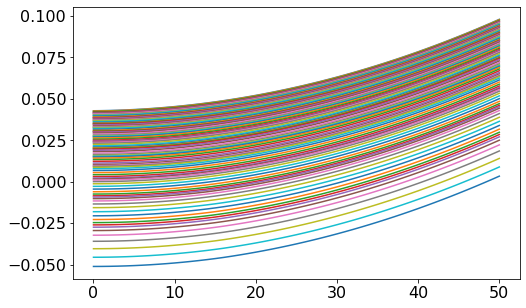

In [754]:
plt.plot(v0)
plt.show()

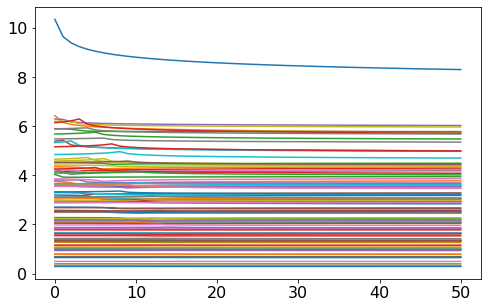

In [755]:
plt.plot(Ca)
plt.show()

In [758]:
t_max = 100.
dt = 0.01
# dt = 1  # , Gigaton per year
gridpoints = (T_grid, C_grid)   
Ca_func = RegularGridInterpolator(gridpoints, Ca)

T_0 = 1.1
C_0 = 417 - 280
F_0 = (870 - 580) / 2.13 # total cumulated, as of now, preindustrial with Fo


def get_e(x):
    return Ca_func([x[0], x[1]])



# Vegetation growth function
def veggrowth_1d(T):
    if T < Tlow:
        return 0
    if (T >= Tlow) and (T < Topt1):
        return acc / (Topt1 - Tlow) * (T - Tlow)
    if (T >= Topt1) and (T <= Topt2):
        return acc
    if (T > Topt2) and (T < Thigh):
        #return acc
        return acc / (Topt2 - Thigh) * (T - Thigh)
    if T > Thigh:
        #return acc
        return 0

def oceanatmphysflux_1d(T):
    return 1 / tauc * (coc0 * (np.exp(-bP * (T - T0))))


def oceanbioflux_1d(T):
     return 1/tauc * (coc0 * (np.exp(bB * (T - T0))))

def oceanatmcorrflux_1d(C):
    return 1 / tauc * (- cod * C)


def mu_T(x):
#     Ri_t = 1 / cearth * (Q0 * (1 - p * alphaland - (1 - p) * alphaocean))
    Ro_t = 1. / cearth * ( - kappa * (x[0]) +  B * np.log(x[1] + C0) - B * np.log(C0))
    return Ro_t

def mu_C(x):
    # x[0] temperature anomaly, x[1] carbon anomaly
    Ca_t = Ca_func([x[0], x[1]])
    dC = Ca_t # - Volcan / C_preindustrial * x[1] # - wa * (x[1]) * vegcover - (1 - fracseaice)  * cod / tauc * (x[1]) + coc0 / tauc * (1 - fracseaice) * (np.exp( bB * (x[0] + T_preindustrial - T0)) - np.exp( bB * (T_preindustrial - T0))) + coc0 / tauc * (1 - fracseaice) * (np.exp(-bP * (x[0] + T_preindustrial - T0)) - np.exp(-bP * (T_preindustrial - T0)))
    return dC


years  = np.arange(0, t_max + dt, dt)
pers   = len(years)

hist      = np.zeros([pers, 2])
e_hist    = np.zeros([pers])


for tm in range(pers):
    if tm == 0:
        # initial points
        hist[0,:] = [T_0, C_0] # logL
        e_hist[0] = get_e(hist[0, :])

    else:
        # other periods
        e_hist[tm] = get_e(hist[tm-1,:])

        hist[tm,0] = hist[tm-1,0] + mu_T(hist[tm-1,:]) * dt
        hist[tm,1] = hist[tm-1,1] + mu_C(hist[tm-1,:]) * dt


Text(0.5, 1.0, 'Emission in Gigaton, \n heat capacity = 0.107')

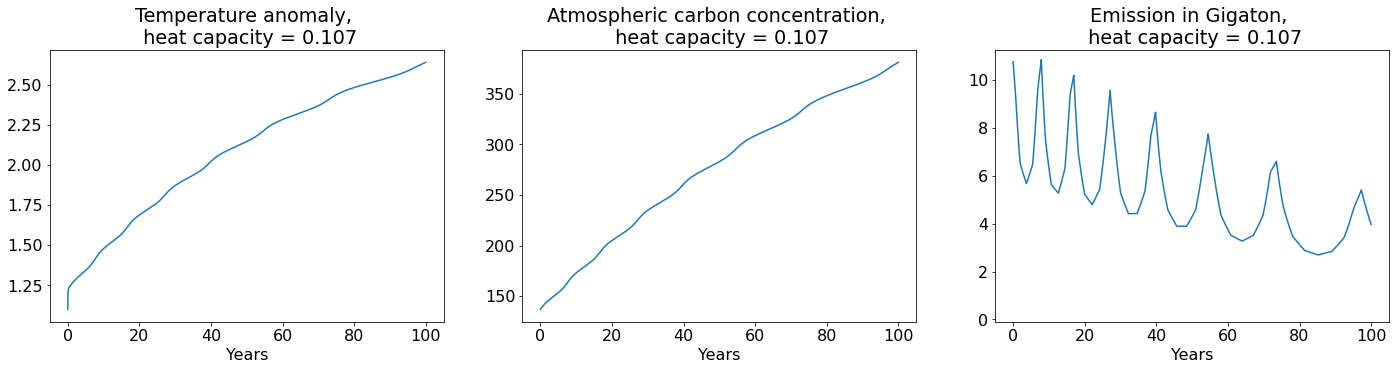

In [764]:
plt.subplots(1,3, figsize=(24,5))
plt.subplot(131)
plt.plot(years, hist[:, 0])
plt.xlabel("Years")
plt.title("Temperature anomaly, \n heat capacity = {}".format(cearth))
plt.subplot(132)
plt.plot(years, hist[:, 1])
plt.xlabel("Years")
plt.title("Atmospheric carbon concentration, \n heat capacity = {}".format(cearth))
plt.subplot(133)
plt.plot(years, e_hist * 2.13)
plt.xlabel("Years")
plt.ylim(-0.1)
plt.title("Emission in Gigaton, \n heat capacity = {}".format(cearth))
# plt.savefig("T_C_E_0p107_Ca.png", bbox_inches="tight", facecolor="w", edgecolor="w")

In [711]:
# np.save("Et_opt_cearth10.npy", hist[:, 0])

In [744]:
Et = e_hist * 2.13

Text(0.5, 1.0, 'Emission in GtC')

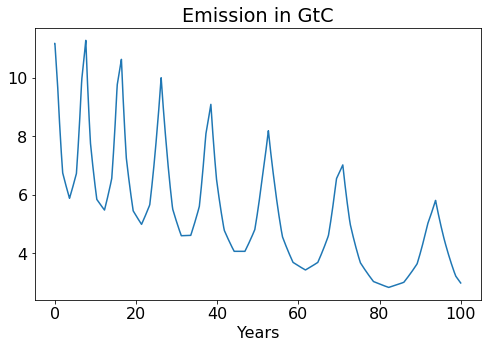

In [760]:
plt.plot(years, Et)
plt.xlabel("Years")
plt.title("Emission in GtC")

In [716]:
def DYDT(t, y):
    T = y[0]
    C = y[1]

    T = y[0]
    C = y[1]

    dT = 1. / cearth * ( - kappa * T + B * np.log(C + C0) - B * np.log(C0))
#     dT -= Ro(T, C)
    Ws = np.random.normal(size=(2,1))
#     dC = Volcan
    dC = Yam(t) - Volcan / C_preindustrial * C  # + (1 - fracseaice) * cod / tauc * C) + coc0 / tauc * (1 - fracseaice) * (np.exp(-bP * (T + T_preindustrial - T0) - np.exp(-bP * (T_preindustrial - T0)))) + coc0 / tauc * (1 - fracseaice) * (np.exp(bB * (T + T_preindustrial - T0) - np.exp(bB * (T_preindustrial - T0))))   # biological pump flux * fraction sea ice
#     dC += oceanbioflux(T) * (1 - fracseaice(T))      # biological pump flux * fraction sea ice
#     dC += oceanatmcorrflux(C) * (1 - fracseaice)    # correction parameter
  # correction parameter

    return dT, dC

In [717]:
#Nullclines
T_values = np.linspace(0, 20, 201)
C_values = np.linspace(0, 2000, 200)

z = np.zeros((len(C_values), len(T_values), 2))
for i, C_value in enumerate(C_values):
    for j, T_value in enumerate(T_values):
        z[i, j, :] = DYDT(0, [T_value, C_value])

z = np.abs(z)**0.2 * np.sign(z)

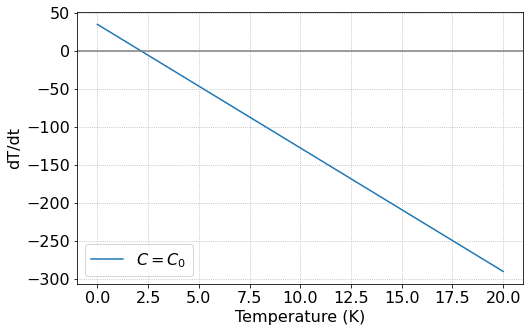

In [718]:
plt.plot(T_values, [dydt(0, [val, C0])[0] for val in T_values], label=r'$C=C_{0}$')
#ax.tick_params(axis='both', which='major', labelsize=12)
plt.axhline(0, color='gray')
plt.legend()
plt.xlabel('Temperature (K)', fontsize = 16)
plt.ylabel('dT/dt', fontsize = 16)
#plt.ylabel(r'$\dot{T}$')
plt.grid(linestyle=':')
# plt.ylim([-10, 10])

Text(0.5, 1.0, 'dT/dt')

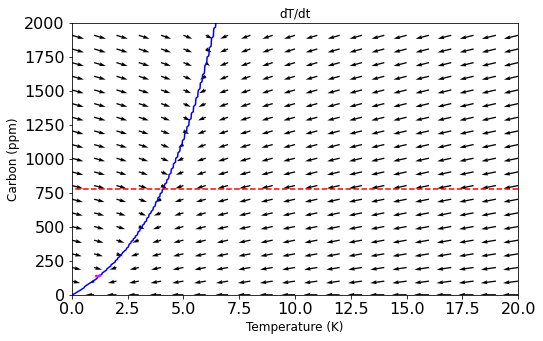

In [719]:
fig, axs = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(8, 5))
plt.rcParams.update({'font.size': 16})
plt.xticks(fontsize=16)
zmax = np.percentile(np.abs(z), 95, axis=(0, 1))
#axs.contourf(T_values, C_values, z[..., 0], 20, cmap='coolwarm', vmin=-zmax, vmax=zmax)
axs.contour(T_values, C_values, z[..., 0], levels=0, linestyles='-', colors='b')
axs.contour(T_values, C_values, z[..., 1], levels=0, linestyles='--', colors='r')
axs.quiver(T_values[::10], C_values[::10], z[::10, ::10, 0], z[::10, ::10, 1] )
axs.plot(hist[:, 0], hist[:,1], 'magenta', linewidth=2.5)
axs.set_xlabel('Temperature (K)', fontsize =12)
axs.set_ylabel('Carbon (ppm)', fontsize=12)
axs.set_title('dT/dt', fontsize =12)
#axs.set_title('$\dot T$')


In [720]:
#Nullclines
T_values = np.linspace(0, 20, 201)
C_values = np.linspace(0, 2000, 200)

z = np.zeros((len(C_values), len(T_values), 2))
for i, C_value in enumerate(C_values):
    for j, T_value in enumerate(T_values):
        z[i, j, :] = DYDT(-1, [T_value, C_value])

z = np.abs(z)**0.2 * np.sign(z)

Text(0.5, 1.0, 'Velocity field, at year 100')

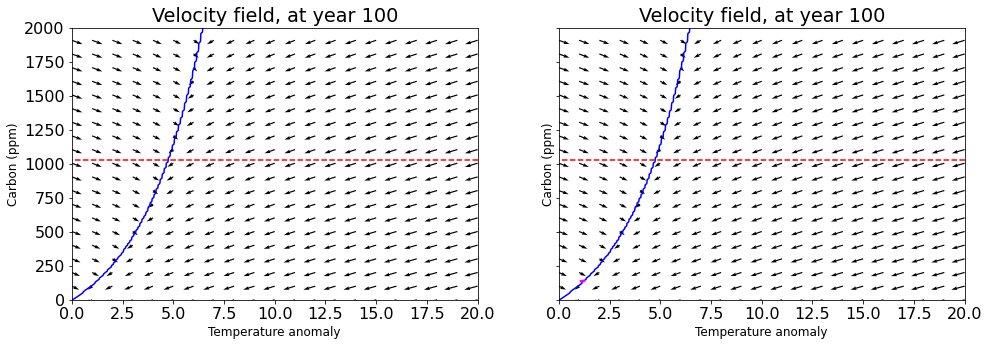

In [721]:
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(2 * 8, 5))
# plt.rcParams.update({'font.size': 16})
# plt.xticks(fontsize=16)
# 1
zmax = np.percentile(np.abs(z), 95, axis=(0, 1))
#axs.contourf(T_values, C_values, z[..., 0], 20, cmap='coolwarm', vmin=-zmax, vmax=zmax)
axs[0].contour(T_values, C_values, z[..., 0], levels=0, linestyles='-', colors='b')
axs[0].contour(T_values, C_values, z[..., 1], levels=0, linestyles='--', colors='r')
axs[0].quiver(T_values[::10], C_values[::10], z[::10, ::10, 0], z[::10, ::10, 1] )
axs[0].set_xlabel('Temperature anomaly', fontsize =12)
axs[0].set_ylabel('Carbon (ppm)', fontsize =12)
# axs[0].text(1.0025 * 10, C0, r'$\frac{dC}{dt} = 0$', verticalalignment='center', fontsize=12)
# axs[0].text(1.0025 * 10, C0 + 180, r'$\frac{dT}{dt} = 0$', verticalalignment='center', fontsize=12)
axs[0].set_title("Velocity field, at year 100")
# 2
axs[1].contour(T_values, C_values, z[..., 0], levels=0, linestyles='-', colors='b')
axs[1].contour(T_values, C_values, z[..., 1], levels=0, linestyles='--', colors='r')
axs[1].quiver(T_values[::10], C_values[::10], z[::10, ::10, 0], z[::10, ::10, 1] )
axs[1].plot(hist[:, 0], hist[:,1], 'magenta', linewidth=2.5)
axs[1].set_xlabel('Temperature anomaly', fontsize =12)
axs[1].set_ylabel('Carbon (ppm)', fontsize =12)
axs[1].set_title("Velocity field, at year 100")
#axs.set_title('$\dot T$')

# plt.savefig("dT_dC.pdf")